# SENTIMENT ANALYSIS OF RESPONSES FROM BENEFICIARIES TO LIVELIHOOD SUBPROJECTS IN ZAMBIA
**Author:** Nathan Namatama  
**Institution:** Leibniz Institute of Ecological Urban and Regional Development and Technical University of Dresden  
**Year:** 2024  
**Related Publication:** The effects and impacts of livelihood activities and unplanned human settlement growth on greenspace and wetland landscapes in Zambia: *A case of the three areas of the Pilot Programme for Climate Resilience (PPCR)*  

## Purpose of the Analysis
The analysis is conducted on the data collection that was conducted in Zambia from 23rd July 2024 to 22nd September 2024. The primary data was collected using ArcGIS Survey123 application in an offline mode mostly in certain areas that did not have access to internet while those that ahd internet an online mode was used. The respondents were interviewed using a semi structured question and the responses were recorede in the application as they were responding to the questions.

The analysis is done in the framework of _systems thinking_ of looking at _deep leverage points_ in the **_governance for transformation_** of Social Ecologocal Systems so as to attain sustainable transfomation. The analysis is done in both qualitative and quantitatives (descriptions) to produce graphs and tables that are visualised within the jupyterlab notebook.

##  Table of Contents

1. <a href="#1.-Importing-Libraries">Importing Libraries</a>
2. <a href="#2.-Reading-the-Excel-Table">Reading the Excel Table</a>
3. <a href="#3.-Missing-values">Missing values</a>
4. <a href="#4.-Deleting-Columnns">Deleting Columnns</a>
5. <a href="#5.-Renaming-Columns">Renaming Columns</a> 
6. <a href="#6.-Selection-of-Likert-Scale-Columns">Selection of Likert Scale Columns</a>
7. <a href="#7.-The-Number-of-Responses">The Number of Responses</a>
8. <a href="#8.-Defined-or-Responses-with-Choices">Defined or Responses with Choices</a>
9. <a href="#9.-Description-Statistics ">Description Statistics</a>
10. <a href="#10.-Reasons">Reasons</a>
11. <a href="#11.-Specific-Variables">Specific Variables</a>
12. <a href="#12.-Converting-the-Notebook">Converting the Notebook</a>

## 1. Importing Libraries 
   The liberarries that are needed for conducting the analysis are installed and downloaded. They are as follows:
- **_NLTK:_** for reading text and understanding it in a way that a human can do it
- **_Re:_**
- **_Pandas:_** For converting tables into a format understandable by the computer as well as visualisation
- **_Numpy:_** For conducting statistical culculations
- **_Matplotlib:_** For visualisation
- **_Seabron:_** For visualisation
- **_Io:_**
- **_Csv:_** For reading the csv files
- **_Unicodeddata:_**
- **_String:_**
- **_Plotly:_** For visualisation
- **_Plot_Likert:_** For visualisation of likert scales
- **_%matplotlib line:_** For visualisation within the jupyterlab notebook
- **_Nbconvert:_** For converting to HTML format

In [1]:
import nltk
import re
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split
%matplotlib inline
import nbconvert
from nbconvert import HTMLExporter
import nbformat

In [2]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Reading the Excel Table
   The csv file is converted to a padas dataframe

In [3]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")
pd.set_option('display.max_colwidth', None)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,ObjectID,GlobalID,Logo_TUDresden,Logo_IOER,Name of Researcher: Nathan Namatama,Email: n.namatama@ioer.de,Logo,The social survey questionnaire is meant to gather information on three things:,•\t How social and ecological systems are managed: This includes understanding how communities and natural environments are governed.,"•\t How people's livelihood activities change the landscape: This looks at how different livelihoods impact the land, environment as well as the land use land cover change.",...,Specify:.2,Specify:.3,Specify:.4,Specify:.5,Specify:.6,Specify:.7,Specify:.8,Specify:.9,x,y
0,1,b8330d48-b014-43e9-83ee-65e2eef11c4f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,2,bb5a8756-5fa8-425b-b48e-590943d89688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,3,4330fe39-a7c1-4c52-adf5-80b1ea153095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.628698,-11.663522
3,4,a65873e1-686d-4f03-973d-a4620eb9798b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.441380,-11.549158
4,5,d9d192e3-225a-4e27-b439-a5b881a0e26e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,All the cannot change except for hunting,Only the protection nature the others are not important,NaN,NaN,NaN,When the people come them they give us imformation,NaN,29.441459,-11.549211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0b3b2aad-707c-46c2-ac09-4d38e14e1d3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.202439,-15.374461
146,147,de6da6cc-c6e1-4114-adf0-14a03a50354d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tgrought word of mouth,Fromm pin,23.201394,-15.377789
147,148,1dd0393e-d55a-4c1c-8052-8c678c177fd3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phones and through word mouth,NaN,23.176112,-15.387063
148,149,49eec3a2-09ae-42f2-b670-b526478ffd0b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Through phone and word of mouth,NaN,23.173384,-15.389017


In [6]:
df.shape

(150, 120)

## 3. Missing values
   The Pandas Dataframe is checked for mising values

In [7]:
df.isnull().sum()

ObjectID                                 0
GlobalID                                 0
Logo_TUDresden                         150
Logo_IOER                              150
Name of Researcher: Nathan Namatama    150
                                      ... 
Specify:.7                             150
Specify:.8                              60
Specify:.9                             126
x                                        0
y                                        0
Length: 120, dtype: int64

### 3.1 Dropping all the Missing Values

In [8]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                              150
Logo_TUDresden                         150
Email: n.namatama@ioer.de              150
Name of Researcher: Nathan Namatama    150
Logo                                   150
                                      ... 
Editor                                   0
CreationDate                             0
Creator                                  0
x                                        0
y                                        0
Length: 120, dtype: int64

In [9]:
#df.dropna(inplace=True)

## 4. Deleting Columnns
   There are 120 columns and 85 columns were removed from the pandas dataframe so as to focus on specific columns that have questtions in regards to livelihood and landscape transfromation

In [10]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [11]:
df1

,ObjectID,6. Ward Name,7. Sub Project Name,8. Type of Livelihood,9. Size (Lima),12. Name of main project,13. Do you represent other beneficiaries?,14. How many beneficiaries do you represent?,"45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?",46. What reasons can you give for your answer above?,...,62. Are there new livelihood projects that you think of that have never been implemented?,63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?,64. Which livelihood is a major contributor to landscape transformation?,65. What reasons can you give for your answer above?,66. Which type of landscape do you depend on much for a livelihood?,67. What reasons can you give for your answer above?,Specify:.4,Specify:.5,Specify:.6,Specify:.7
0,1,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Disagree_Likert,It has never happed before in his life time,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused reduced rainfall,Agriculture_Areas_Dependent,He cultivates a large area of land so that some crops can be sold for a livelihood,NaN,NaN,NaN,NaN
1,2,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land for agriculture for to plant crops hence the landscape change,Wetlands_Dependent,The catching of fish is the source of income in this area,NaN,NaN,NaN,NaN
2,3,Isamba ward,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees hence contributing to climate change,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than fish because the fish can be depleted,NaN,NaN,NaN,NaN
3,4,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There are crop rotations made on the land when cultivating to ensure fertility of soil,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the others like making charcoal,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living,NaN,NaN,NaN,NaN
4,5,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,yes,20to30People_Many,Strongly_Disagree_Likert,There is nothing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Yeta ward,NaN,Biochar,NaN,PIN_WESTERN,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,NaN,Strongly_Agree_Likert,Wood_Extraction,They use Chitemene system of just cutting trees for charcoal,Agriculture_Areas_Dependent,We farmers,NaN,NaN,NaN,NaN
147,148,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,The

## 5. Renaming Columns
   The headings of the columns were renamed for easy inclusion in the code

In [12]:
df1.columns

Index(['ObjectID', '6. Ward Name', '7. Sub Project Name',
       '8. Type of Livelihood', '9. Size (Lima)', '12. Name of main project',
       '13. Do you represent other beneficiaries?',
       '14. How many beneficiaries do you represent?',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How

In [13]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project',
                        '13. Do you represent other beneficiaries?': 'Representing_Others',
                        '14. How many beneficiaries do you represent?': 'Number_Beneficiaries',
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [14]:
df2

,ObjectID,Ward_Name,Sub_Project_name,Livelihood,Size,Name_Main_Project,Representing_Others,Number_Beneficiaries,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason,...,New_Livelihood_Projects,Subprojects_Sustainability_Contribution,Contributor_Landscape_Transformation,Contributor_Landscape_Transformation_Reasons,Landscape_Depended_Livelihood,Landscape_Depeneded_Livelihood_Reasons,Purpose_Landscape_Specific,Connection_Nature_Specific,Contributor_Landscape_Transformation_Specific,Landscape_Depended_Livelihood_Specific
0,1,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Disagree_Likert,It has never happed before in his life time,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,The trees have been depleted and it has caused reduced rainfall,Agriculture_Areas_Dependent,He cultivates a large area of land so that some crops can be sold for a livelihood,NaN,NaN,NaN,NaN
1,2,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because i have to clear the land for agriculture for to plant crops hence the landscape change,Wetlands_Dependent,The catching of fish is the source of income in this area,NaN,NaN,NaN,NaN
2,3,Isamba ward,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management,...,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Wood_Extraction,There would a reduction in the number of trees hence contributing to climate change,"Agriculture_Areas_Dependent,Wetlands_Dependent",He depends much on agriculture the most than fish because the fish can be depleted,NaN,NaN,NaN,NaN
3,4,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many,Strongly_Agree_Likert,There are crop rotations made on the land when cultivating to ensure fertility of soil,...,Strongly_Disagree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because it requires a huge land than the others like making charcoal,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living,NaN,NaN,NaN,NaN
4,5,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,yes,20to30People_Many,Strongly_Disagree_Likert,There is nothing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Land_Agriculture,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,"Forest_Dependent,Wetlands_Dependent",The water is used for gardening and other things,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Yeta ward,NaN,Biochar,NaN,PIN_WESTERN,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,NaN,Strongly_Agree_Likert,Wood_Extraction,They use Chitemene system of just cutting trees for charcoal,Agriculture_Areas_Dependent,We farmers,NaN,NaN,NaN,NaN
147,148,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert,There is nothing,...,Strongly_Agree_Likert,Strongly_Agree_Likert,Wood_Extraction,"The trees that are cut and made into charcoal, the trunks or stems do not grow",Agriculture_Areas_Dependent,Thats where we get food and money,NaN,NaN,NaN,NaN
148,149,Yeta ward,B iochar,Gardenning,8to12Lima_Size,PIN_WESTERN,no,NaN,Strongly_Disagree_Likert

## 6. Selection of Likert Scale Columns
   The columns that had likert scale responses were group in a single dataframe and they are 12 in number the columns were looking at the following questions as numbered in the questionaire:
- '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?
- '47. Do you think some cultural practices can be changed?',
- '48. Do you consider cultural aspects when formulating the livelihood projects?',
- '51. Do you think there is need to measure indicators when managing landscapes?',
- '55. Does your livelihood depend on the natural resources for a living?',
- '56. Do you consider changing your livelihood strategy in future?',
- '57. Do you think it is easier to change your livelihood practices?',
- '59. Have the ecosystem services reduced from the inception of the project in your ward?',
- '60. Has the deforestation increased in the ward?',
- '61. Do you think protected areas are a hindrance to your livelihoods?',
- '62. Are there new livelihood projects that you think of that have never been implemented?',
- '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?'   

In [15]:
df3=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,9,12,13,15,16,17,21,27,28,29,30,31,32,33,34]], axis = 1)

In [16]:
df3

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
0,Disagree_Likert,Undecided_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
1,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
2,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert
3,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert
4,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
...,...,...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,NaN,Strongly_Agree_Likert
147,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert
148,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,Strongly_Agree_Likert,NaN,Strongly_Disagree_Likert,Strongly_Agree_Likert


## 7. The Number of Responses
   The number of responses were counted for each column that had a likert scale and the NaN indicates no response 

In [17]:
all_counts = df3.apply(pd.Series.value_counts, dropna=False)

In [18]:
all_counts

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
Agree_Likert,20,29,19,28,35,39,46,39,16,14.0,58,37
Disagree_Likert,22,22,20,4,25,37,24,13,32,19.0,15,4
Strongly_Agree_Likert,21,29,22,81,44,38,49,72,72,15.0,36,81
Strongly_Disagree_Likert,70,41,66,22,32,20,18,16,17,83.0,19,15
Undecided_Likert,4,9,7,7,4,5,4,3,1,NaN,10,3
NaN,13,20,16,8,10,11,9,7,12,19.0,12,10


### 7.1 Transposing the Dataframe Table
    The columns and the rows were interchanged so that they can be easily presented on the graph

In [19]:
all_counts1 = all_counts.head().T

In [20]:
all_counts1

,Agree_Likert,Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Undecided_Likert
Cultural_Practices_Hinder,20.0,22.0,21.0,70.0,4.0
Cultural_Practices_Changed,29.0,22.0,29.0,41.0,9.0
Cultural_Aspects_Considered,19.0,20.0,22.0,66.0,7.0
Measure_Indicators,28.0,4.0,81.0,22.0,7.0
Livilihood_Depenedent,35.0,25.0,44.0,32.0,4.0
Change_Livelihood,39.0,37.0,38.0,20.0,5.0
Change_Livelihood_Easy,46.0,24.0,49.0,18.0,4.0
Ecosystem_Services_Reduced,39.0,13.0,72.0,16.0,3.0
Deforestaion_Increased,16.0,32.0,72.0,17.0,1.0
Protected_Areas_Hinderarnce_Livelihood,14.0,19.0,15.0,83.0,NaN


### 7.2 Changing the Order of Columns
    The order of columns was changed so that they can be easily analysed

In [21]:
all_counts2 = all_counts1.iloc[:, [3, 1, 4, 0, 2]]

In [22]:
all_counts2 

,Strongly_Disagree_Likert,Disagree_Likert,Undecided_Likert,Agree_Likert,Strongly_Agree_Likert
Cultural_Practices_Hinder,70.0,22.0,4.0,20.0,21.0
Cultural_Practices_Changed,41.0,22.0,9.0,29.0,29.0
Cultural_Aspects_Considered,66.0,20.0,7.0,19.0,22.0
Measure_Indicators,22.0,4.0,7.0,28.0,81.0
Livilihood_Depenedent,32.0,25.0,4.0,35.0,44.0
Change_Livelihood,20.0,37.0,5.0,39.0,38.0
Change_Livelihood_Easy,18.0,24.0,4.0,46.0,49.0
Ecosystem_Services_Reduced,16.0,13.0,3.0,39.0,72.0
Deforestaion_Increased,17.0,32.0,1.0,16.0,72.0
Protected_Areas_Hinderarnce_Livelihood,83.0,19.0,NaN,14.0,15.0


### 7.3 Visualising the Results
    The results were visualised in form of number of responses

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


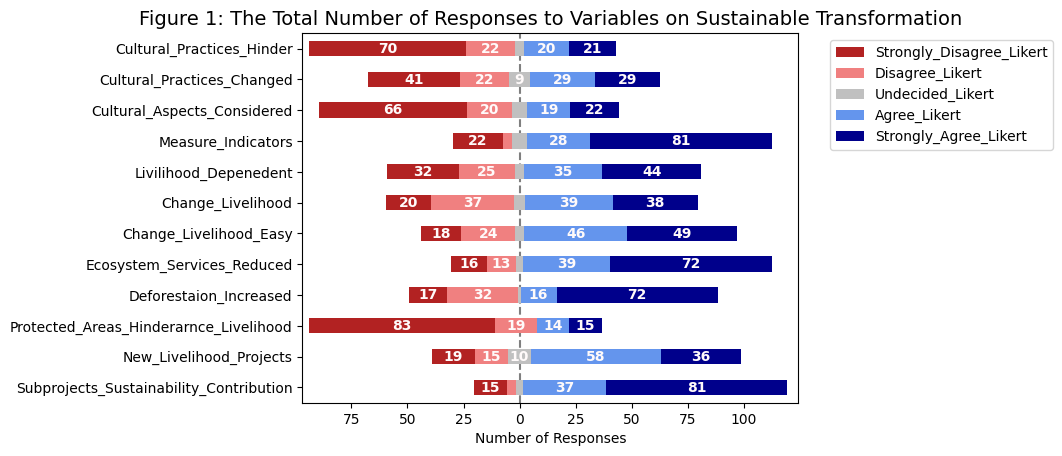

In [23]:
%matplotlib inline
plot_likert.plot_counts(all_counts2, plot_likert.scales.agree,  plot_percentage=False, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 1: The Total Number of Responses to Variables on Sustainable Transformation", fontsize=14)
plt.show()

### 7.4 Converting the Responses to Percentages
    The responses were converted to percentages

In [24]:
all_counts3 = df3.apply(lambda col: col.value_counts(normalize=True, dropna=False).round(2))

In [25]:
all_counts3 

,Cultural_Practices_Hinder,Cultural_Practices_Changed,Cultural_Aspects_Considered,Measure_Indicators,Livilihood_Depenedent,Change_Livelihood,Change_Livelihood_Easy,Ecosystem_Services_Reduced,Deforestaion_Increased,Protected_Areas_Hinderarnce_Livelihood,New_Livelihood_Projects,Subprojects_Sustainability_Contribution
Agree_Likert,0.13,0.19,0.13,0.19,0.23,0.26,0.31,0.26,0.11,0.09,0.39,0.25
Disagree_Likert,0.15,0.15,0.13,0.03,0.17,0.25,0.16,0.09,0.21,0.13,0.10,0.03
Strongly_Agree_Likert,0.14,0.19,0.15,0.54,0.29,0.25,0.33,0.48,0.48,0.10,0.24,0.54
Strongly_Disagree_Likert,0.47,0.27,0.44,0.15,0.21,0.13,0.12,0.11,0.11,0.55,0.13,0.10
Undecided_Likert,0.03,0.06,0.05,0.05,0.03,0.03,0.03,0.02,0.01,NaN,0.07,0.02
NaN,0.09,0.13,0.11,0.05,0.07,0.07,0.06,0.05,0.08,0.13,0.08,0.07


#### 7.4.1 Transposing the Dataframe Table
      Interchanging the rows and columns

In [26]:
all_counts4 = all_counts3.head().T

In [27]:
all_counts4

,Agree_Likert,Disagree_Likert,Strongly_Agree_Likert,Strongly_Disagree_Likert,Undecided_Likert
Cultural_Practices_Hinder,0.13,0.15,0.14,0.47,0.03
Cultural_Practices_Changed,0.19,0.15,0.19,0.27,0.06
Cultural_Aspects_Considered,0.13,0.13,0.15,0.44,0.05
Measure_Indicators,0.19,0.03,0.54,0.15,0.05
Livilihood_Depenedent,0.23,0.17,0.29,0.21,0.03
Change_Livelihood,0.26,0.25,0.25,0.13,0.03
Change_Livelihood_Easy,0.31,0.16,0.33,0.12,0.03
Ecosystem_Services_Reduced,0.26,0.09,0.48,0.11,0.02
Deforestaion_Increased,0.11,0.21,0.48,0.11,0.01
Protected_Areas_Hinderarnce_Livelihood,0.09,0.13,0.10,0.55,NaN


#### 7.4.2 Changing the Order of Columns
      The order of columns was changed

In [28]:
all_counts5 = all_counts4.iloc[:, [3, 1, 4, 0, 2]]

In [29]:
all_counts5 

,Strongly_Disagree_Likert,Disagree_Likert,Undecided_Likert,Agree_Likert,Strongly_Agree_Likert
Cultural_Practices_Hinder,0.47,0.15,0.03,0.13,0.14
Cultural_Practices_Changed,0.27,0.15,0.06,0.19,0.19
Cultural_Aspects_Considered,0.44,0.13,0.05,0.13,0.15
Measure_Indicators,0.15,0.03,0.05,0.19,0.54
Livilihood_Depenedent,0.21,0.17,0.03,0.23,0.29
Change_Livelihood,0.13,0.25,0.03,0.26,0.25
Change_Livelihood_Easy,0.12,0.16,0.03,0.31,0.33
Ecosystem_Services_Reduced,0.11,0.09,0.02,0.26,0.48
Deforestaion_Increased,0.11,0.21,0.01,0.11,0.48
Protected_Areas_Hinderarnce_Livelihood,0.55,0.13,NaN,0.09,0.10


#### 7.4.3 Visualising the Results
    The results are visualised as pecentages

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


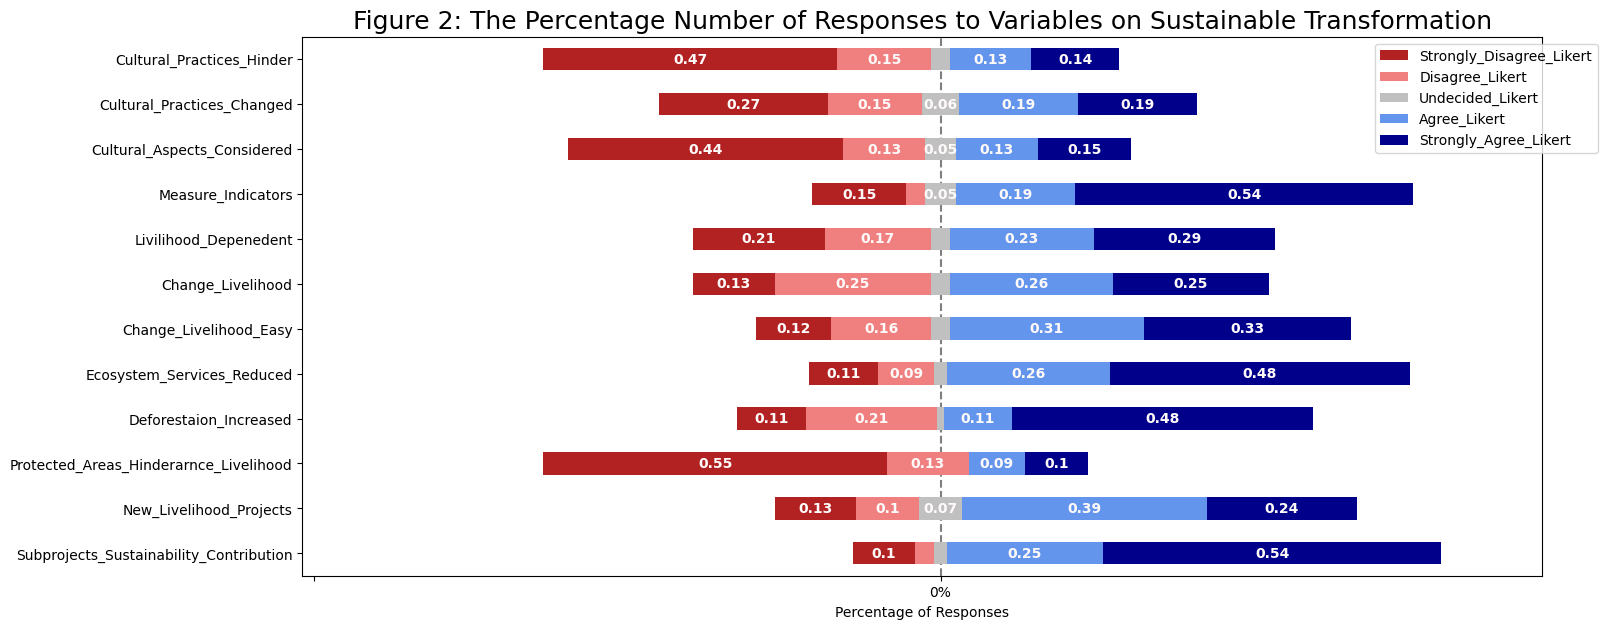

In [30]:
%matplotlib inline
plot_likert.plot_counts(all_counts5, plot_likert.scales.agree,  plot_percentage=True, figsize=(16, 7), bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 2: The Percentage Number of Responses to Variables on Sustainable Transformation", fontsize=18)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 8. Defined or Responses with Choices
    The responses that had choices other than those with a likert scale were grouped in a pandas dataframe looking the following question:
    
1. '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
2. '52. How is your connection to nature like?': 'Connection_Nature', 
3. '54. How long have you worked on this livelihood project?': 'Livelihood_Project',
4. '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
5. '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood'
    

In [31]:
df4=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34]], axis = 1)

In [32]:
df4

,Purpose_Landscape,Connection_Nature,Livelihood_Project,Contributor_Landscape_Transformation,Landscape_Depended_Livelihood
0,Nature_Protection_Purpose,"Psychological_Connection,Material_Connection",3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
1,Nature_Protection_Purpose,"Philosophical_Connection,Psychological_Connection",Greaterthan9Years_Long,Land_Agriculture,Wetlands_Dependent
2,"Nature_Protection_Purpose,Ancestral_Shrines_Purpose",Experiential_Connection,5to6Years_Long,Wood_Extraction,"Agriculture_Areas_Dependent,Wetlands_Dependent"
3,Source_Income_Purpose,Material_Connection,Greaterthan9Years_Long,Land_Agriculture,Agriculture_Areas_Dependent
4,Nature_Protection_Purpose,"Philosophical_Connection,Psychological_Connection",5to6Years_Long,Land_Agriculture,"Forest_Dependent,Wetlands_Dependent"
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN
146,Nature_Protection_Purpose,Material_Connection,3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
147,NaN,Material_Connection,3to4Years_Long,Wood_Extraction,Agriculture_Areas_Dependent
148,Nature_Protection_Purpose,Material_Connection,3to4Years_Long,Uncontrolled_Fires,Agriculture_Areas_Dependent


### 8.1 The Purpose of Landscape to People

In [33]:
PL = df4['Purpose_Landscape'].value_counts(dropna=False)
PL_P = (df4['Purpose_Landscape'].value_counts(normalize=True, dropna=False).round(2))

In [34]:
PL_P

Purpose_Landscape
Nature_Protection_Purpose                              0.62
NaN                                                    0.22
Source_Income_Purpose                                  0.11
Nature_Protection_Purpose,Other_Purpose                0.01
Nature_Protection_Purpose,Ancestral_Shrines_Purpose    0.01
Source_Income_Purpose,Nature_Protection_Purpose        0.01
Nature_Protection_Purpose,Source_Income_Purpose        0.01
Source_Income_Purpose,Other_Purpose                    0.01
No_Idea_Purpose                                        0.01
Other_Purpose                                          0.01
Name: proportion, dtype: float64

In [35]:
df_PL = pd.DataFrame(PL)

In [36]:
df_PL

,count
Purpose_Landscape,
Nature_Protection_Purpose,93
NaN,33
Source_Income_Purpose,16
"Nature_Protection_Purpose,Other_Purpose",2
"Nature_Protection_Purpose,Ancestral_Shrines_Purpose",1
"Source_Income_Purpose,Nature_Protection_Purpose",1
"Nature_Protection_Purpose,Source_Income_Purpose",1
"Source_Income_Purpose,Other_Purpose",1
No_Idea_Purpose,1


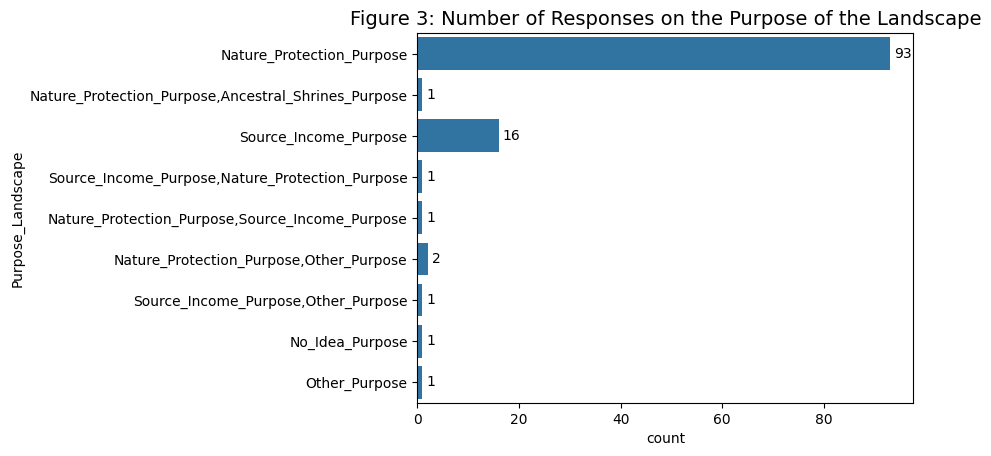

In [37]:
ax = sns.countplot(df4["Purpose_Landscape"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 3: Number of Responses on the Purpose of the Landscape", fontsize=14)
plt.show()

### 8.2 The Connection of Nature to People

In [38]:
CN = df4['Connection_Nature'].value_counts(dropna=False)
CN_P = (df4['Connection_Nature'].value_counts(normalize=True, dropna=False).round(2))

In [39]:
CN_P

Connection_Nature
Material_Connection                                  0.82
NaN                                                  0.09
Other_Connection                                     0.04
Experiential_Connection                              0.01
Philosophical_Connection,Psychological_Connection    0.01
Psychological_Connection,Material_Connection         0.01
Psychological_Connection                             0.01
Philosophical_Connection                             0.01
Experiential_Connection,Material_Connection          0.01
Name: proportion, dtype: float64

In [40]:
df_CN = pd.DataFrame(CN)

In [41]:
df_CN

,count
Connection_Nature,
Material_Connection,123
NaN,13
Other_Connection,6
Experiential_Connection,2
"Philosophical_Connection,Psychological_Connection",2
"Psychological_Connection,Material_Connection",1
Psychological_Connection,1
Philosophical_Connection,1
"Experiential_Connection,Material_Connection",1


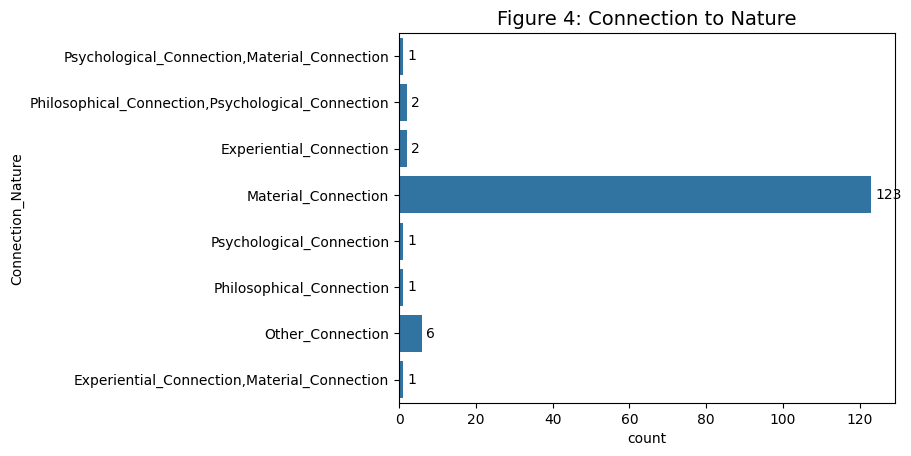

In [42]:
ax = sns.countplot(df4["Connection_Nature"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 4: Connection to Nature", fontsize=14)
plt.show()

In [43]:
agreement_levels = ["Material_Connection", "Other_Connection"]
CN_R = df2[df2["Connection_Nature"].isin(agreement_levels)]
CN_R1 = CN_R.drop(CN_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CN_R1grouped = CN_R1.groupby('Name_Main_Project')['Connection_Nature']
CN_R1

,Name_Main_Project,Connection_Nature,Connection_Nature_Reasons
3,TRALARD_LNM,Material_Connection,To use some of them for income
6,TRALARD_LNM,Material_Connection,They are a source of income and for the future generation to see them
7,TRALARD_LNM,Material_Connection,Source of income
8,TRALARD_LNM,Material_Connection,It is a source of income
10,TRALARD_LNM,Material_Connection,Thats were we get income as welll as for example cattle we use it for cultivating
...,...,...,...
144,PIN_WESTERN,Material_Connection,NaN
146,PIN_WESTERN,Material_Connection,NaN
147,PIN_WESTERN,Material_Connection,NaN
148,PIN_WESTERN,Material_Connection,NaN


In [44]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CN_R1.iterrows():
    CN_R1_filter_sentence = []
    CN_R1_sentence = row["Connection_Nature_Reasons"]
    if pd.isnull(CN_R1_sentence):
       continue
    CN_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_R1_sentence)
    CN_R1_words = nltk.word_tokenize(CN_R1_sentence_cleaned)
    CN_R1_words = [lemmatizer.lemmatize(w) for w in CN_R1_words if w.lower() not in stop_words]
    CN_R1_filter_sentence.extend(CN_R1_words)
    print(CN_R1_filter_sentence)

['use', 'income']
['source', 'income', 'future', 'generation', 'see']
['Source', 'income']
['source', 'income']
['Thats', 'get', 'income', 'welll', 'example', 'cattle', 'use', 'cultivating']
['help', 'u', 'source', 'income', 'form', 'meat', 'animal', 'tree', 'rain', 'come', 'protected']
['need', 'keep', 'fish', 'instance', 'fish', 'pond', 'get', 'extinct']
['one', 'look', 'daily', 'basis']
['source', 'livelihood']
['need', 'protect', 'nature', 'instance', 'cutting', 'tree', 'along', 'river', 'lead', 'drying', 'destruction', 'animal', 'biodiversity', 'river']
['answer']
['purpose', 'future', 'meet', 'need']
['source', 'income']
['tree', 'help', 'u', 'bring', 'rainfall']
['Source', 'income']
['harvest', 'right', 'time', 'prevent', 'management', 'natural', 'resource', 'properly']
['taking', 'care']
['Source', 'income']
['Source', 'income']
['bring', 'development', 'tourism']
['income']
['natural', 'resource', 'like', 'tree', 'give', 'shade', 'medicine', 'also', 'get', 'fresh', 'air']
['Li

### 8.3 The Length of Existence of the Livelihood Project

In [45]:
LP = df4['Livelihood_Project'].value_counts(dropna=False)
LP_P = (df4['Livelihood_Project'].value_counts(normalize=True, dropna=False).round(2))

In [46]:
LP_P

Livelihood_Project
3to4Years_Long            0.42
5to6Years_Long            0.33
NaN                       0.08
Lessthan2Years_Long       0.06
7to8Years_Long            0.06
Greaterthan9Years_Long    0.05
Name: proportion, dtype: float64

In [47]:
df_LP = pd.DataFrame(LP)

In [48]:
df_LP

,count
Livelihood_Project,
3to4Years_Long,63
5to6Years_Long,50
NaN,12
Lessthan2Years_Long,9
7to8Years_Long,9
Greaterthan9Years_Long,7


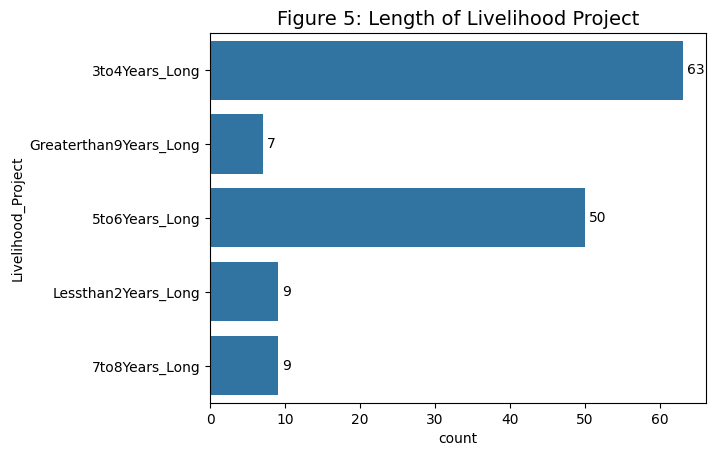

In [49]:
ax = sns.countplot(df4["Livelihood_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 5: Length of Livelihood Project", fontsize=14)
plt.show()

### 8.4 Major Contributor to Landscape Transformation

In [50]:
CLT = df4['Contributor_Landscape_Transformation'].value_counts(dropna=False)
CLT_P = (df4['Contributor_Landscape_Transformation'].value_counts(normalize=True, dropna=False).round(2))

In [51]:
CLT_P

Contributor_Landscape_Transformation
Uncontrolled_Fires                     0.33
Land_Agriculture                       0.29
Wood_Extraction                        0.26
NaN                                    0.09
Uncontrolled_Grazing                   0.01
Uncontrolled_Fires,Land_Agriculture    0.01
Other                                  0.01
Name: proportion, dtype: float64

In [52]:
df_CLT = pd.DataFrame(CLT)

In [53]:
df_CLT

,count
Contributor_Landscape_Transformation,
Uncontrolled_Fires,49
Land_Agriculture,44
Wood_Extraction,39
NaN,14
Uncontrolled_Grazing,2
"Uncontrolled_Fires,Land_Agriculture",1
Other,1


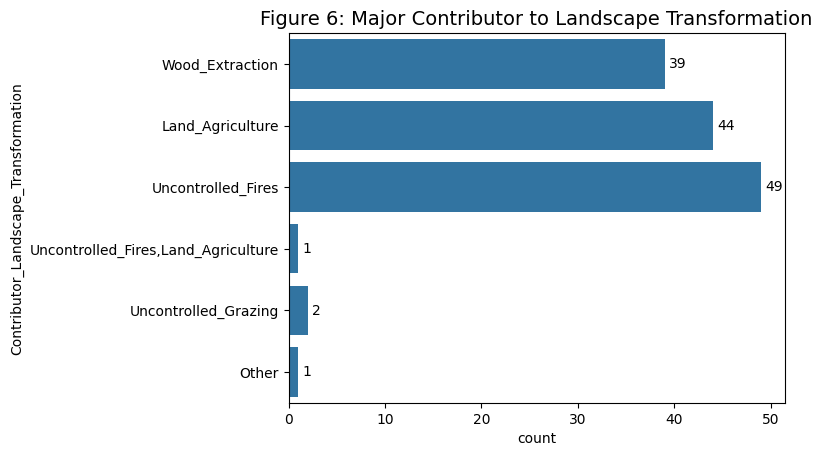

In [54]:
ax = sns.countplot(df4["Contributor_Landscape_Transformation"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 6: Major Contributor to Landscape Transformation", fontsize=14)
plt.show()

In [55]:
agreement_levels = ["Wood_Extration", "Land_Agriculture","Uncontrolled_Fires"]
CLT_R = df2[df2["Contributor_Landscape_Transformation"].isin(agreement_levels)]
CLT_R1 = CN_R.drop(CLT_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34]], axis = 1)
CLT_R1grouped = CLT_R1.groupby('Name_Main_Project')['Contributor_Landscape_Transformation']
CLT_R1

,Name_Main_Project,Contributor_Landscape_Transformation,Contributor_Landscape_Transformation_Reasons
3,TRALARD_LNM,Land_Agriculture,Because it requires a huge land than the others like making charcoal
6,TRALARD_LNM,Wood_Extraction,The burning of charcoal give smoke that destroys the ozone layer as well as it brings acidic rains
7,TRALARD_LNM,Land_Agriculture,There are agriculture activities for food
8,TRALARD_LNM,Wood_Extraction,There is no electricity thus a huge demand for energy
10,TRALARD_LNM,Wood_Extraction,The charcoal purposes is bad because the land is left bare unlike for agriculture cutting which is replaced with other plants
...,...,...,...
144,PIN_WESTERN,Uncontrolled_Fires,The trees when they get burnt they dry and thats the reason we have less rainfall
146,PIN_WESTERN,Wood_Extraction,They use Chitemene system of just cutting trees for charcoal
147,PIN_WESTERN,Wood_Extraction,"The trees that are cut and made into charcoal, the trunks or stems do not grow"
148,PIN_WESTERN,Uncontrolled_Fires,It destroys everything on its ways


In [56]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLT_R1.iterrows():
    CLT_R1_filter_sentence = []
    CLT_R1_sentence = row["Contributor_Landscape_Transformation_Reasons"]
    if pd.isnull(CLT_R1_sentence):
       continue
    CLT_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_R1_sentence)
    CLT_R1_words = nltk.word_tokenize(CLT_R1_sentence_cleaned)
    CLT_R1_words = [lemmatizer.lemmatize(w) for w in CLT_R1_words if w.lower() not in stop_words]
    CLT_R1_filter_sentence.extend(CLT_R1_words)
    print(CLT_R1_filter_sentence)

['requires', 'huge', 'land', 'others', 'like', 'making', 'charcoal']
['burning', 'charcoal', 'give', 'smoke', 'destroys', 'ozone', 'layer', 'well', 'brings', 'acidic', 'rain']
['agriculture', 'activity', 'food']
['electricity', 'thus', 'huge', 'demand', 'energy']
['charcoal', 'purpose', 'bad', 'land', 'left', 'bare', 'unlike', 'agriculture', 'cutting', 'replaced', 'plant']
['cultivation', 'cassava', 'requires', 'always', 'barren', 'land', 'never', 'cultivated', 'grow', 'well', 'crop', 'bean', 'vegetable', 'maize', 'reduce', 'deforestation']
['burn', 'tree', 'shoot']
['Chitemene', 'system', 'cultivation', 'lead', 'deforestation', 'others']
['source', 'food', 'people', 'area']
['Thats', 'get', 'livelihood']
['source', 'income']
['time', 'cut', 'tree', 'even', 'want', 'cultivate', 'well', 'burining', 'kill', 'animal', 'necesary', 'making', 'soil', 'fertile']
['Buring', 'destroy', 'product', 'crop', 'soil']
['cutting', 'treed', 'change', 'landscape']
['cutting', 'tress', 'destroys', 'much'

### 8.5 The Landscape Depended on for a Livelihood

In [57]:
LDL = df4['Landscape_Depended_Livelihood'].value_counts(dropna=False)
LDL_P = (df4['Landscape_Depended_Livelihood'].value_counts(normalize=True, dropna=False).round(2))

In [58]:
LDL_P

Landscape_Depended_Livelihood
Agriculture_Areas_Dependent                       0.61
Wetlands_Dependent                                0.17
Forest_Dependent                                  0.09
NaN                                               0.09
Wetlands_Dependent,Forest_Dependent               0.03
Agriculture_Areas_Dependent,Wetlands_Dependent    0.01
Forest_Dependent,Wetlands_Dependent               0.01
Wetlands_Dependent,Agriculture_Areas_Dependent    0.01
Name: proportion, dtype: float64

In [59]:
df_LDL = pd.DataFrame(LDL)

In [60]:
df_LDL

,count
Landscape_Depended_Livelihood,
Agriculture_Areas_Dependent,92
Wetlands_Dependent,25
Forest_Dependent,13
NaN,13
"Wetlands_Dependent,Forest_Dependent",4
"Agriculture_Areas_Dependent,Wetlands_Dependent",1
"Forest_Dependent,Wetlands_Dependent",1
"Wetlands_Dependent,Agriculture_Areas_Dependent",1


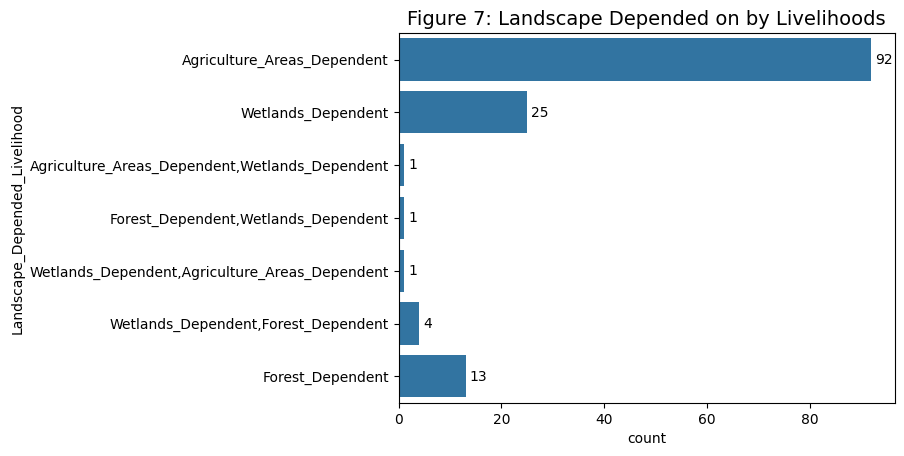

In [61]:
ax = sns.countplot(df4["Landscape_Depended_Livelihood"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 7: Landscape Depended on by Livelihoods", fontsize=14)
plt.show()

In [62]:
agreement_levels = ["Agriculture_Areas_Dependent", "Wetland_Depenedent","Forest_Dependent"]
LDL_R = df2[df2["Landscape_Depended_Livelihood"].isin(agreement_levels)]
LDL_R1 = LDL_R.drop(LDL_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34]], axis = 1)
LDL_R1grouped = LDL_R1.groupby('Name_Main_Project')['Landscape_Depended_Livelihood']
LDL_R1

,Name_Main_Project,Landscape_Depended_Livelihood,Landscape_Depeneded_Livelihood_Reasons
0,TRALARD_LNM,Agriculture_Areas_Dependent,He cultivates a large area of land so that some crops can be sold for a livelihood
3,TRALARD_LNM,Agriculture_Areas_Dependent,Food is the main source of livelihood thus without it there is no way to earn a living
5,TRALARD_LNM,Agriculture_Areas_Dependent,That is a source of income as well as food for consumption
6,TRALARD_LNM,Agriculture_Areas_Dependent,The farming helps in sourcing of food
8,TRALARD_LNM,Agriculture_Areas_Dependent,Thats a source of income
...,...,...,...
143,SCReBS_WESTERN,Agriculture_Areas_Dependent,We are farmers
144,PIN_WESTERN,Agriculture_Areas_Dependent,That is where we get our crops from
146,PIN_WESTERN,Agriculture_Areas_Dependent,We farmers
147,PIN_WESTERN,Agriculture_Areas_Dependent,Thats where we get food and money


In [63]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in LDL_R1.iterrows():
    LDL_R1_filter_sentence = []
    LDL_R1_sentence = row["Landscape_Depeneded_Livelihood_Reasons"]
    if pd.isnull(LDL_R1_sentence):
       continue
    LDL_R1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_R1_sentence)
    LDL_R1_words = nltk.word_tokenize(LDL_R1_sentence_cleaned)
    LDL_R1_words = [lemmatizer.lemmatize(w) for w in LDL_R1_words if w.lower() not in stop_words]
    LDL_R1_filter_sentence.extend(LDL_R1_words)
    print(LDL_R1_filter_sentence)

['cultivates', 'large', 'area', 'land', 'crop', 'sold', 'livelihood']
['Food', 'main', 'source', 'livelihood', 'thus', 'without', 'way', 'earn', 'living']
['source', 'income', 'well', 'food', 'consumption']
['farming', 'help', 'sourcing', 'food']
['Thats', 'source', 'income']
['source', 'livelihood']
['income', 'come', 'living']
['help', 'u', 'cultivate', 'cassava', 'maize', 'much', 'fishing', 'activity']
['farming', 'obtain', 'food', 'consumption', 'household', 'level']
['food', 'security', 'come']
['tree', 'bring', 'rainfall', 'area', 'compared', 'area']
['source', 'income']
['majority', 'people', 'cultivate', 'land', 'livelihood', 'depending', 'buying', 'shop']
['Thats', 'whats', 'common', 'within', 'area']
['source', 'traditional', 'medicine']
['source', 'food', 'crop', 'income']
['use', 'cultivation']
['Source', 'income']
['mostly', 'farmer']
['Thats', 'source', 'income', 'livelihood']
['food', 'crop']
['food', 'crop', 'come']
['Thats', 'source', 'food', 'crop', 'well', 'income']


## 8.6 Explanation to Choices
 It gives an explanation to the choice selected that is not among the choices that were provided in the list of the questionnaire

In [64]:
df5=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis = 1)

In [65]:
df5

,Purpose_Landscape_Specific,Connection_Nature_Specific,Contributor_Landscape_Transformation_Specific,Landscape_Depended_Livelihood_Specific
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Only the protection nature the others are not important,NaN,NaN,NaN
...,...,...,...,...
145,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN


In [150]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    PL_RS1_filter_sentence = []
    PL_RS1_sentence = row["Purpose_Landscape_Specific"]
    if pd.isnull(PL_RS1_sentence):
       continue
    PL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',PL_RS1_sentence)
    PL_RS1_words = nltk.word_tokenize(PL_RS1_sentence_cleaned)
    PL_RS1_words = [lemmatizer.lemmatize(w) for w in PL_RS1_words if w.lower() not in stop_words]
    PL_RS1_filter_sentence.extend(PL_RS1_words)
    print(PL_RS1_filter_sentence)

['protection', 'nature', 'others', 'important']
['fire', 'burn', 'thr', 'biodiversitity', 'helo', 'environmental', 'procrss']
['torist', 'bring', 'invome', 'view', 'thr', 'animal']
['source', 'income', 'tourism']


In [67]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CN_RS1_filter_sentence = []
    CN_RS1_sentence = row["Connection_Nature_Specific"]
    if pd.isnull(CN_RS1_sentence):
       continue
    CN_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_RS1_sentence)
    CN_RS1_words = nltk.word_tokenize(CN_RS1_sentence_cleaned)
    CN_RS1_words = [lemmatizer.lemmatize(w) for w in CN_RS1_words if w.lower() not in stop_words]
    CN_RS1_filter_sentence.extend(CN_RS1_words)
    print(CN_RS1_filter_sentence)

['Taking', 'care', 'nature', 'destroying']
['Taking', 'care', 'nature']
['Source', 'good', 'air', 'food', 'prodicts']
['related']
['Protection', 'tree']
['Taking', 'care', 'ov', 'animal']


In [68]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CLT_RS1_filter_sentence = []
    CLT_RS1_sentence = row["Contributor_Landscape_Transformation_Specific"]
    if pd.isnull(CLT_RS1_sentence):
       continue
    CLT_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_RS1_sentence)
    CLT_RS1_words = nltk.word_tokenize(CLT_RS1_sentence_cleaned)
    CLT_RS1_words = [lemmatizer.lemmatize(w) for w in CLT_RS1_words if w.lower() not in stop_words]
    CLT_RS1_filter_sentence.extend(CLT_RS1_words)
    print(CLT_RS1_filter_sentence)

['Cutting', 'tree', 'sale']


In [69]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    LDL_RS1_filter_sentence = []
    LDL_RS1_sentence = row["Landscape_Depended_Livelihood_Specific"]
    if pd.isnull(LDL_RS1_sentence):
       continue
    LDL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_RS1_sentence)
    LDL_RS1_words = nltk.word_tokenize(LDL_RS1_sentence_cleaned)
    LDL_RS1_words = [lemmatizer.lemmatize(w) for w in LDL_RS1_words if w.lower() not in stop_words]
    LDL_RS1_filter_sentence.extend(LDL_RS1_words)
    print(LDL_RS1_filter_sentence)

## 9. Description Statistics 
    It gives a background to the study sites

In [70]:
df6=df2.drop(df2.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)

In [71]:
df6

,Ward_Name,Sub_Project_name,Livelihood,Size,Name_Main_Project,Representing_Others,Number_Beneficiaries
0,Isamba ward,Isamba coperatives,Goat rearing,8to12Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
1,Isamba ward,Misenga cooperative multipurpose society,"Goat rearing, Gardening, Fruit trees",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
2,Isamba ward,Ninge Cooperative,"Goat Rearing, Agricuture-cassava",Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
3,Isamba ward,Twikatene copperatives,Goat rearing and Fish farming and garden of vegitable and onnoind,Greaterthan16Lima_Size,TRALARD_LNM,yes,Greaterthan40People_Many
4,Isamba ward,Changwena women club,Chicken rearing ablnd an orchard,Lessthan4Lima_Size,TRALARD_LNM,yes,20to30People_Many
...,...,...,...,...,...,...,...
145,Yeta ward,NaN,Biochar,NaN,PIN_WESTERN,no,NaN
146,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN
147,Yeta ward,Biochar,Gardening,Lessthan4Lima_Size,PIN_WESTERN,no,NaN
148,Yeta ward,B iochar,Gardenning,8to12Lima_Size,PIN_WESTERN,no,NaN


[<a href="#Purpose-of-the-Analysis">Back to top</a>]

### 9.1 Main project Types
    This shows the number of questionaires that were administered to each project type

In [72]:
MP = df6['Name_Main_Project'].value_counts(dropna=False)

In [73]:
MP

Name_Main_Project
SCRiKA_LS                               44
TRALARD_LNM                             40
SCRALA_SOUTHERN_WESTERN_NORTHEN         30
SCReBS_WESTERN                          15
Ecosystem Conservation_NORTH_WESTERN    11
PIN_WESTERN                              6
EbA_CENTRAL_MUCHINGA_LUAPULA             3
NaN                                      1
Name: count, dtype: int64

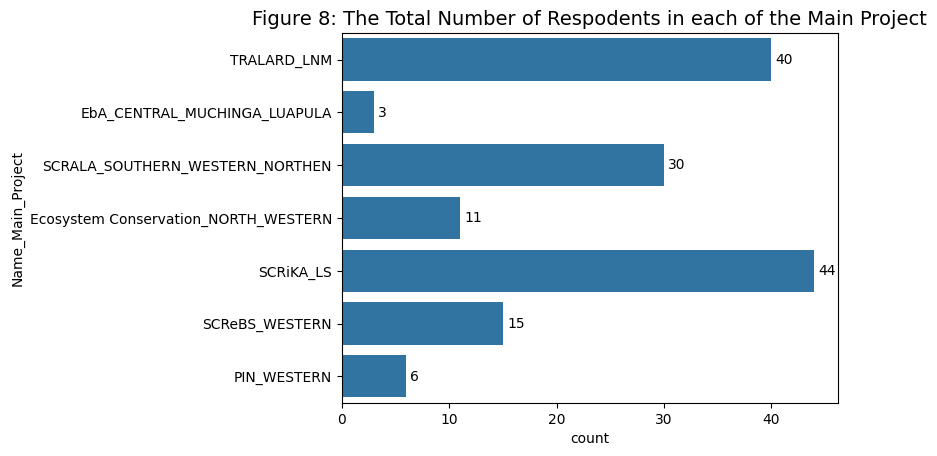

In [74]:
ax = sns.countplot(df6["Name_Main_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 8: The Total Number of Respodents in each of the Main Project", fontsize=14)
plt.show()

### 9.2 The Wards
    The wards that had respodents and their number

In [75]:
WN = df6['Ward_Name'].value_counts(dropna=False)

In [76]:
WN

Ward_Name
Namwala Central ward    16
Omba ward               15
Mbila ward              14
Yeta ward               11
Lulimala ward           11
Isamba ward             10
Kalobolelwa ward         9
Ntonga ward              8
Kalanga ward             8
Moofwe ward              7
Mwanabuyu ward           7
Makuya ward              6
Chitimbwa ward           6
Nachikufu ward           5
Ntambu ward              4
Luubwe ward              4
Mwanbuyu ward            3
NaN                      2
Nanwala Central ward     1
Silunga ward             1
Chitimbwa  ward          1
 mwanabuyu ward          1
Name: count, dtype: int64

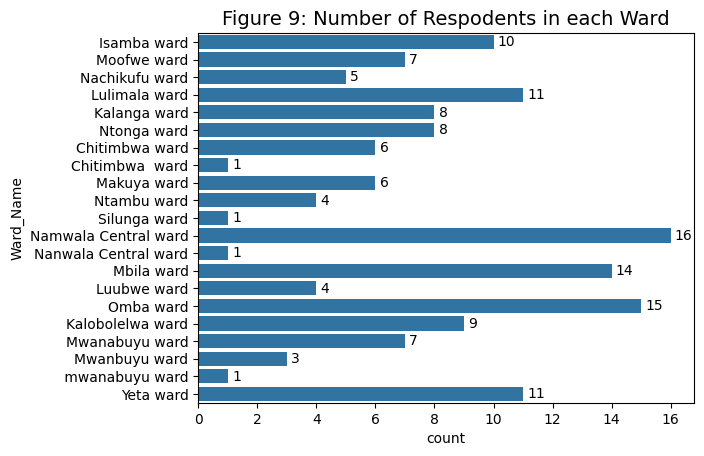

In [149]:
ax = sns.countplot(df6["Ward_Name"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 9: Number of Respodents in each Ward", fontsize=14)
plt.show()

### 9.3 Number of beneficiaries
    It shows the number of households that benefited from the interviewees

In [78]:
NB = df6['Number_Beneficiaries'].value_counts(dropna=False)

In [79]:
NB

Number_Beneficiaries
Greaterthan40People_Many    40
10to20People_Many           25
NaN                         25
20to30People_Many           24
30to40People_Many           23
Lessthan10People_Many       13
Name: count, dtype: int64

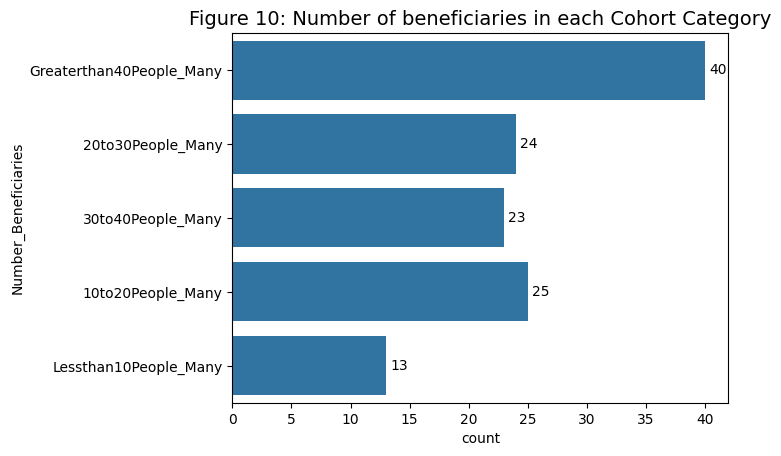

In [80]:
ax = sns.countplot(df6["Number_Beneficiaries"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 10: Number of beneficiaries in each Cohort Category", fontsize=14)
plt.show()

### 9.4 Size of Landscape

In [81]:
SIZE = df6['Size'].value_counts(dropna=False)

In [82]:
SIZE

Size
Lessthan4Lima_Size        48
Greaterthan16Lima_Size    40
NotApplicable_Size        31
4to8Lima_Size             13
NaN                       10
8to12Lima_Size             5
12to16Lima_Size            3
Name: count, dtype: int64

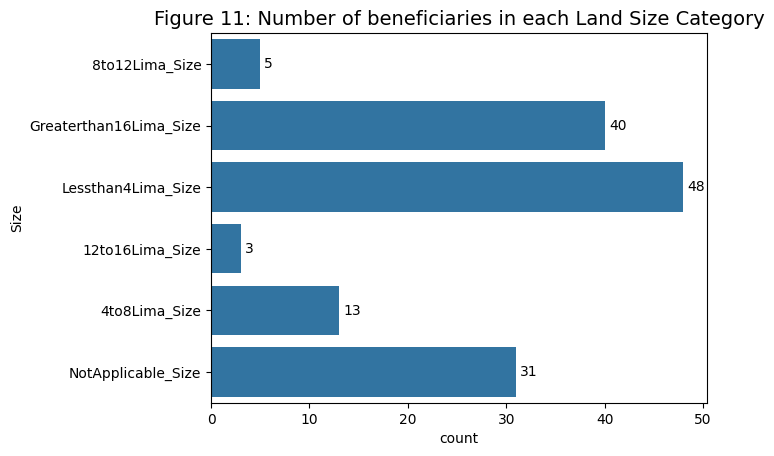

In [83]:
ax = sns.countplot(df6["Size"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 11: Number of beneficiaries in each Land Size Category", fontsize=14)
plt.show()

### 9.5 Represing Others
    It looks at those representing one house and more

In [84]:
RO = df6['Representing_Others'].value_counts(dropna=False)

In [85]:
RO

Representing_Others
yes    125
no      23
NaN      2
Name: count, dtype: int64

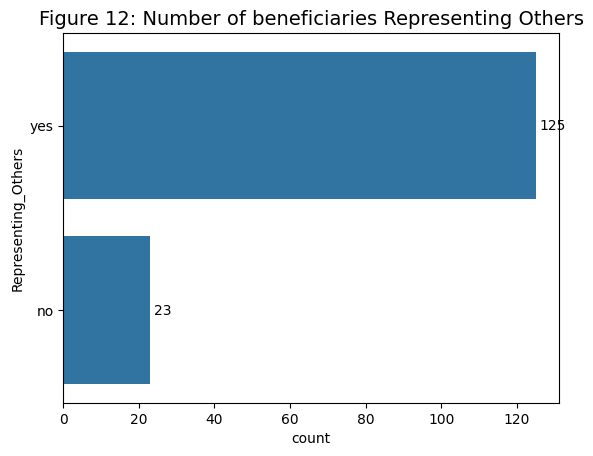

In [86]:
ax = sns.countplot(df6["Representing_Others"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 12: Number of beneficiaries Representing Others", fontsize=14)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 10. Reasons
The pandas dataframe depicts columns for the reasons to the responses to the likert scales

In [87]:
df7=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,13,14,15,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34]], axis = 1)

In [88]:
df7

,Cultural_Practices_Hinder_Reason,Cultural_Aspects_Considered_Reasons,Connection_Nature_Reasons,Change_Livelihood_Easy_Reasons,Contributor_Landscape_Transformation_Reasons,Landscape_Depeneded_Livelihood_Reasons
0,It has never happed before in his life time,There is no cultural history in the area,The animals can be used by the future general as well,If the SES are taken care of they can increase in number and bring income to him,The trees have been depleted and it has caused reduced rainfall,He cultivates a large area of land so that some crops can be sold for a livelihood
1,There is need to harvest tree when they have fully grown the same applies to biodiversity,There is need to have power in what he formulating so that there is ownership,How the animals they lead thems we can get examples from them,The SeS can be depleted thus there need to change to agriculture like goat rearing,Because i have to clear the land for agriculture for to plant crops hence the landscape change,The catching of fish is the source of income in this area
2,There are no customary practices that hinder sustainable management,There are no cultural aspects,Through experiments he gains knowledge on the management of forest,Change is easier because he is the one who has deciededs to change,There would a reduction in the number of trees hence contributing to climate change,He depends much on agriculture the most than fish because the fish can be depleted
3,There are crop rotations made on the land when cultivating to ensure fertility of soil,At the time of getting the land for the project it commes with regulations,To use some of them for income,Because my livelihood would improve,Because it requires a huge land than the others like making charcoal,Food is the main source of livelihood thus without it there is no way to earn a living
4,There is nothing,We only follow what the chiefs and the government say,"They are important in our lifes like trees they provide home for animals as well as food. In addition, improve the soil texture",There has been things like climate change affecting us thus the thought to change,Because people cut down tree for farmimg but they never use the land but he would prefer they use a small portion to leave trees as a home of willd animals,The water is used for gardening and other things
...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN
146,There is nothing,Only the indunas that send the representative to learn and they accept the project in the community,NaN,The person can make a decision through looking back to what he or she done so as to make corrective measures,They use Chitemene system of just cutting trees for charcoal,We farmers
147,There is nothing,There is nothing,NaN,As long as you are committed,"The trees that are cut and made into charcoal, the trunks or stems do not grow",Thats where we get food and money
148,There is nothing,There is nothing,NaN,It is diffi jlt but as long as uou follow whag hou have been gaught uou can change,It destroys everything on its ways,That were our food crops are found


### 10.1 Reasons for Cultural Practices Hidering
     The reasons for cultural practices that hinder transfromation

In [89]:
lemmatizer = WordNetLemmatizer()
CPH = df7['Cultural_Practices_Hinder_Reason'].str.lower().str.cat(sep=' ')
CPH_words = nltk.tokenize.word_tokenize(CPH)
CPH_filtered_tokens = [word for word in CPH_words if len(CPH_words) >= 4]
CPH_lemmatized_words = [lemmatizer.lemmatize(word) for word in CPH_filtered_tokens]
CPH_token_counts = Counter(CPH_lemmatized_words)
CPH_columns = pd.DataFrame(CPH_token_counts.most_common(27),
columns = ['Word', 'Frequency'])
print(CPH_columns)

           Word  Frequency
0         there        104
1            is         95
2       nothing         74
3           the         71
4            to         31
5           are         25
6          that         25
7            of         22
8             a         19
9      practice         16
10         tree         14
11           ''         14
12          not         13
13  environment         12
14           no         11
15       people         11
16          and         11
17     cultural          9
18      protect          9
19          but          9
20           it          8
21         from          8
22         they          7
23         have          7
24    customary          7
25         land          7
26          for          7


In [90]:
lemmatizer = WordNetLemmatizer()
CAC = df7['Cultural_Aspects_Considered_Reasons'].str.lower().str.cat(sep=' ')
CAC_words = nltk.tokenize.word_tokenize(CAC)
CAC_filtered_tokens = [word for word in CAC_words if len(CAC_words) >= 4]
CAC_lemmatized_words = [lemmatizer.lemmatize(word) for word in CAC_filtered_tokens]
CAC_token_counts = Counter(CAC_lemmatized_words)
CAC_columns = pd.DataFrame(CAC_token_counts.most_common(27),
columns = ['Word', 'Frequency'])
print(CAC_columns)

           Word  Frequency
0           the         70
1           not         52
2            is         49
3            we         47
4         there         45
5       nothing         38
6            do         36
7           are         24
8            to         23
9            it         17
10      project         15
11         they         14
12         that         13
13           of         13
14     cultural         12
15         have         11
16          can         11
17     included         11
18           no         10
19           in         10
20            a         10
21      because         10
22  traditional          8
23       follow          7
24     practice          7
25       aspect          6
26          and          6


In [91]:
lemmatizer = WordNetLemmatizer()
CoN = df7['Connection_Nature_Reasons'].str.lower().str.cat(sep=' ')
CoN_words = nltk.tokenize.word_tokenize(CoN)
CoN_filtered_tokens = [word for word in CoN_words if len(CoN_words) >= 4]
CoN_lemmatized_words = [lemmatizer.lemmatize(word) for word in CoN_filtered_tokens]
CoN_token_counts = Counter(CoN_lemmatized_words)
CoN_columns = pd.DataFrame(CoN_token_counts.most_common(37),
columns = ['Word', 'Frequency'])
print(CoN_columns)

          Word  Frequency
0           of         27
1          the         26
2            a         25
3         they         17
4       source         17
5       income         15
6           to         13
7          for         13
8          are         12
9           in         10
10          we          9
11        tree          9
12        them          8
13          is          8
14         get          6
15        from          6
16         and          6
17          it          6
18      animal          5
19        well          5
20           u          5
21      future          4
22           ,          4
23       there          4
24        help          4
25    instance          4
26     protect          4
27       bring          4
28         air          4
29         can          3
30        lead          3
31     through          3
32          on          3
33  management          3
34        like          3
35        food          3
36       thats          3


In [92]:
lemmatizer = WordNetLemmatizer()
CLE = df7['Change_Livelihood_Easy_Reasons'].str.lower().str.cat(sep=' ')
CLE_words = nltk.tokenize.word_tokenize(CLE)
CLE_filtered_tokens = [word for word in CLE_words if len(CLE_words) >= 4]
CLE_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLE_filtered_tokens]
CLE_token_counts = Counter(CLE_lemmatized_words)
CLE_columns = pd.DataFrame(CLE_token_counts.most_common(27),
columns = ['Word', 'Frequency'])
print(CLE_columns)

          Word  Frequency
0          the         76
1           we         68
2           to         66
3            a         62
4           is         58
5       change         52
6           it         37
7          are         36
8          can         31
9        there         30
10        have         30
11         not         29
12  livelihood         28
13        that         28
14          of         27
15         and         22
16          on         21
17          if         19
18     because         19
19           i         18
20        thus         17
21          in         16
22         for         16
23        long         16
24        from         15
25          do         15
26         our         14


In [93]:
lemmatizer = WordNetLemmatizer()
CLT = df7['Contributor_Landscape_Transformation_Reasons'].str.lower().str.cat(sep=' ')
CLT_words = nltk.tokenize.word_tokenize(CLT)
CLT_filtered_tokens = [word for word in CLT_words if len(CLT_words) >= 4]
CLT_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLT_filtered_tokens]
CLT_token_counts = Counter(CLT_lemmatized_words)
CLT_columns = pd.DataFrame(CLT_token_counts.most_common(27),
columns = ['Word', 'Frequency'])
print(CLT_columns)

        Word  Frequency
0        the        139
1         of         56
2          a         53
3       tree         47
4        for         42
5         it         41
6         to         34
7         is         33
8        are         29
9        and         25
10  destroys         24
11      that         22
12    animal         19
13   cutting         18
14      land         16
15  charcoal         16
16     there         15
17   burning         15
18        we         15
19      fire         14
20        in         13
21    people         13
22       cut         13
23      they         13
24      huge         12
25      burn         12
26        on         12


In [94]:
lemmatizer = WordNetLemmatizer()
LDL = df7['Landscape_Depeneded_Livelihood_Reasons'].str.lower().str.cat(sep=' ')
LDL_words = nltk.tokenize.word_tokenize(LDL)
LDL_filtered_tokens = [word for word in LDL_words if len(LDL_words) >= 4]
LDL_lemmatized_words = [lemmatizer.lemmatize(word) for word in LDL_filtered_tokens]
LDL_token_counts = Counter(LDL_lemmatized_words)
LDL_columns = pd.DataFrame(LDL_token_counts.most_common(27),
columns = ['Word', 'Frequency'])
print(LDL_columns)

          Word  Frequency
0           we         62
1           is         51
2         food         51
3            a         46
4          the         43
5         crop         38
6        thats         38
7        where         37
8           of         33
9          our         33
10         get         29
11         for         28
12      source         25
13         and         25
14        that         24
15       water         23
16        from         23
17         are         22
18        were         21
19          it         19
20      income         18
21          in         16
22        life         16
23  livelihood         15
24        come         13
25      farmer         12
26        area         10


[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 11. Specific Variables

### 11.1 Main project and Cultural Practices
The responses are grouped in line with the main projects

In [95]:
CPH_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Hinder'].value_counts(dropna=False)

In [96]:
CPH_grouped

Name_Main_Project                     Cultural_Practices_Hinder
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert         2
                                      Strongly_Disagree_Likert      1
Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert      5
                                      Strongly_Agree_Likert         2
                                      NaN                           2
                                      Agree_Likert                  1
                                      Disagree_Likert               1
PIN_WESTERN                           Strongly_Disagree_Likert      5
                                      NaN                           1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Disagree_Likert              11
                                      Strongly_Disagree_Likert      9
                                      Agree_Likert                  5
                                      Strongly_Agree_Likert         2
                          

In [97]:
CPH_grouped1 = pd.DataFrame(CPH_grouped)

In [98]:
CPH_grouped1

count
Name_Main_Project                    Cultural_Practices_Hinder       
EbA_CENTRAL_MUCHINGA_LUAPULA         Strongly_Agree_Likert          2
                                     Strongly_Disagree_Likert       1
Ecosystem Conservation_NORTH_WESTERN Strongly_Disagree_Likert       5
                                     Strongly_Agree_Likert          2
                                     NaN                            2
                                     Agree_Likert                   1
                                     Disagree_Likert                1
PIN_WESTERN                          Strongly_Disagree_Likert       5
                                     NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Disagree_Likert               11
                                     Strongly_Disagree_Likert       9
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          2
                                     Undecided_Likert               2
                                     NaN                            1
SCReBS_WESTERN                       Strongly_Disagree_Likert      14
                                     Agree_Likert                   1
SCRiKA_LS                            Strongly_Disagree_Likert      20
                                     Disagree_Likert                6
                                     NaN                            6
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          5
                                     Undecided_Likert               2
TRALARD_LNM                          Strongly_Disagree_Likert      16
                                     Strongly_Agree_Likert         10
                                     Agree_Likert                   8
                                     Disagree_Likert                4
                                     NaN                            2

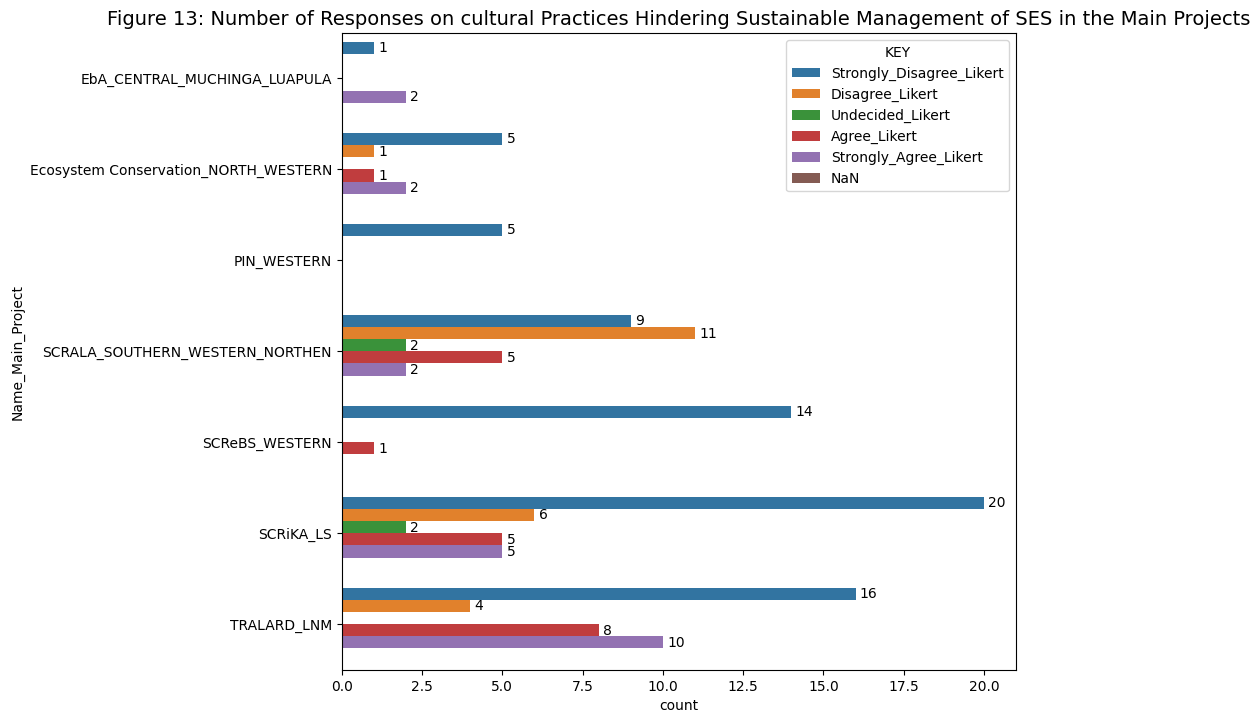

In [99]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert", "NaN"]
ax = sns.barplot(data = CPH_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Hinder", hue_order=hue_order, legend=True)
ax.set_title("Figure 13: Number of Responses on cultural Practices Hindering Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [100]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CPH_R = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [101]:
CPH_R1 = CPH_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R1grouped = CPH_R1.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R1

,Name_Main_Project,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason
1,TRALARD_LNM,Strongly_Agree_Likert,There is need to harvest tree when they have fully grown the same applies to biodiversity
3,TRALARD_LNM,Strongly_Agree_Likert,There are crop rotations made on the land when cultivating to ensure fertility of soil
7,TRALARD_LNM,Strongly_Agree_Likert,You are allowed to cultivate an area for 3 years before shifting to another area
11,TRALARD_LNM,Strongly_Agree_Likert,There are rules from the chiefs who ensure that harvesting period is followed as well as the period of burning the bush
12,TRALARD_LNM,Strongly_Agree_Likert,There is a norm that the bush should be burned when it is not very dry so that the bush is not completely burnt when dry
17,TRALARD_LNM,Strongly_Agree_Likert,There is nothing
19,TRALARD_LNM,Strongly_Agree_Likert,He has never heard of that or learnt about it
22,TRALARD_LNM,Strongly_Agree_Likert,The cutting down of trees along the river is not allowed
23,EbA_CENTRAL_MUCHINGA_LUAPULA,Strongly_Agree_Likert,There acts of late burning that destroys the environment as they would want to catch Catapilars
24,TRALARD_LNM,Agree_Likert,Because a long time ago people had poor management of natural but at the moment there are practice to maintain biodiversity


In [102]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R1.iterrows():
    CPH_R1_filter_sentence = []
    CPH_R1_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R1_sentence):
       continue
    CPH_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R1_sentence)
    CPH_R1_words = nltk.word_tokenize(CPH_R1_sentence_cleaned)
    CPH_R1_words = [lemmatizer.lemmatize(w) for w in CPH_R1_words if w.lower() not in stop_words]
    CPH_R1_filter_sentence.extend(CPH_R1_words)
    print(CPH_R1_filter_sentence)

['need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['crop', 'rotation', 'made', 'land', 'cultivating', 'ensure', 'fertility', 'soil']
['allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'another', 'area']
['rule', 'chief', 'ensure', 'harvesting', 'period', 'followed', 'well', 'period', 'burning', 'bush']
['norm', 'bush', 'burned', 'dry', 'bush', 'completely', 'burnt', 'dry']
['nothing']
['never', 'heard', 'learnt']
['cutting', 'tree', 'along', 'river', 'allowed']
['act', 'late', 'burning', 'destroys', 'environment', 'would', 'want', 'catch', 'Catapilars']
['long', 'time', 'ago', 'people', 'poor', 'management', 'natural', 'moment', 'practice', 'maintain', 'biodiversity']
['cultural', 'practice', 'future', 'generation', 'know', 'anything']
['customary', 'practice', 'promote', 'early', 'burning', 'people', 'tend', 'burn', 'late']
['unregulated', 'allocation', 'parcel', 'land', 'forest']
['Ba', 'chipupila', 'customary', 'practice', 'protecting', 'natural', 'reso

In [103]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CPH_R2 = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [104]:
CPH_R3 = CPH_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R3grouped = CPH_R3.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R3

,Name_Main_Project,Cultural_Practices_Hinder,Cultural_Practices_Hinder_Reason
0,TRALARD_LNM,Disagree_Likert,It has never happed before in his life time
2,TRALARD_LNM,Strongly_Disagree_Likert,There are no customary practices that hinder sustainable management
4,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
5,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
6,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
...,...,...,...
144,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
146,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
147,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
148,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing


In [105]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R3.iterrows():
    CPH_R3_filter_sentence = []
    CPH_R3_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R3_sentence):
       continue
    CPH_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R3_sentence)
    CPH_R3_words = nltk.word_tokenize(CPH_R3_sentence_cleaned)
    CPH_R3_words = [lemmatizer.lemmatize(w) for w in CPH_R3_words if w.lower() not in stop_words]
    CPH_R3_filter_sentence.extend(CPH_R3_words)
    print(CPH_R3_filter_sentence)

['never', 'happed', 'life', 'time']
['customary', 'practice', 'hinder', 'sustainable', 'management']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['cultural', 'history', 'within', 'community', 'except', 'governmnet']
['cultural', 'norm']
['nothing']
['nothing']
['nothing']
['customary', 'practice', 'protect', 'environment', 'like', 'Zawa', 'protect', 'biodiversity']
['chitemene', 'system', 'customary', 'practice', 'destroys', 'environment']
['cultural', 'practice', 'burn', 'bush', 'certain', 'period', 'harvesting']
['cultural', 'practice']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothinhg']
['traditional', 'practice', 'government', 'guide', 'u']
['nothing']
['nothing']
['nothing', 'looked', 'game', 'park', 'officer']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['traditional', 'way', 'management', 'stopped', 'government', 'taken', 'management', 'forest', 'biodiversity']
['nothing']
['long

### 11.2 Main project and Cultural Practices Changed

In [106]:
CPC_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Changed'].value_counts(dropna=False)

In [107]:
CPC_grouped

Name_Main_Project                     Cultural_Practices_Changed
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert          1
                                      Strongly_Disagree_Likert       1
                                      Undecided_Likert               1
Ecosystem Conservation_NORTH_WESTERN  NaN                            5
                                      Strongly_Agree_Likert          4
                                      Strongly_Disagree_Likert       2
PIN_WESTERN                           Strongly_Disagree_Likert       4
                                      Strongly_Agree_Likert          1
                                      NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agree_Likert                  11
                                      Disagree_Likert                7
                                      Strongly_Disagree_Likert       4
                                      Undecided_Likert               4
            

In [108]:
CPC_grouped1 = pd.DataFrame(CPC_grouped)

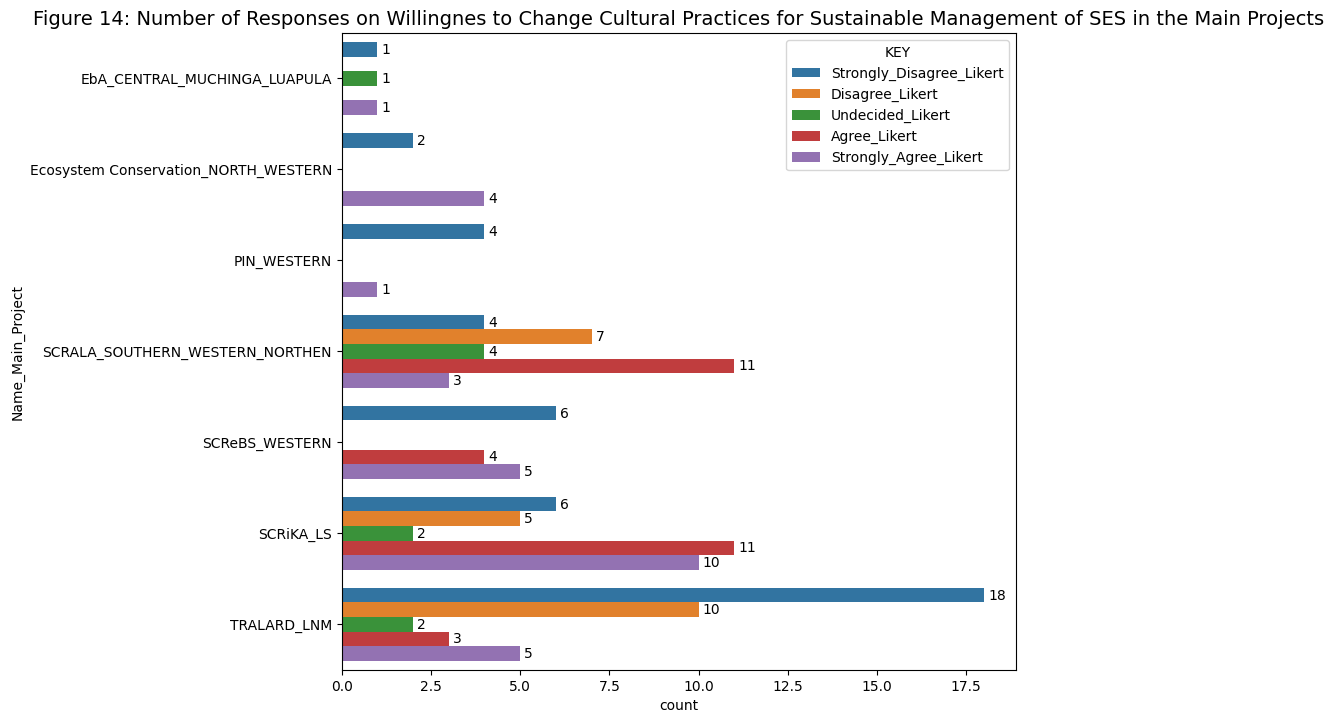

In [109]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CPC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Changed", hue_order=hue_order, legend=True)
ax.set_title("Figure 14: Number of Responses on Willingnes to Change Cultural Practices for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.3 Main project and Cultural Aspects Considered

In [110]:
CAC_grouped = df2.groupby('Name_Main_Project')['Cultural_Aspects_Considered'].value_counts(dropna=False)

In [111]:
CAC_grouped1 = pd.DataFrame(CAC_grouped)

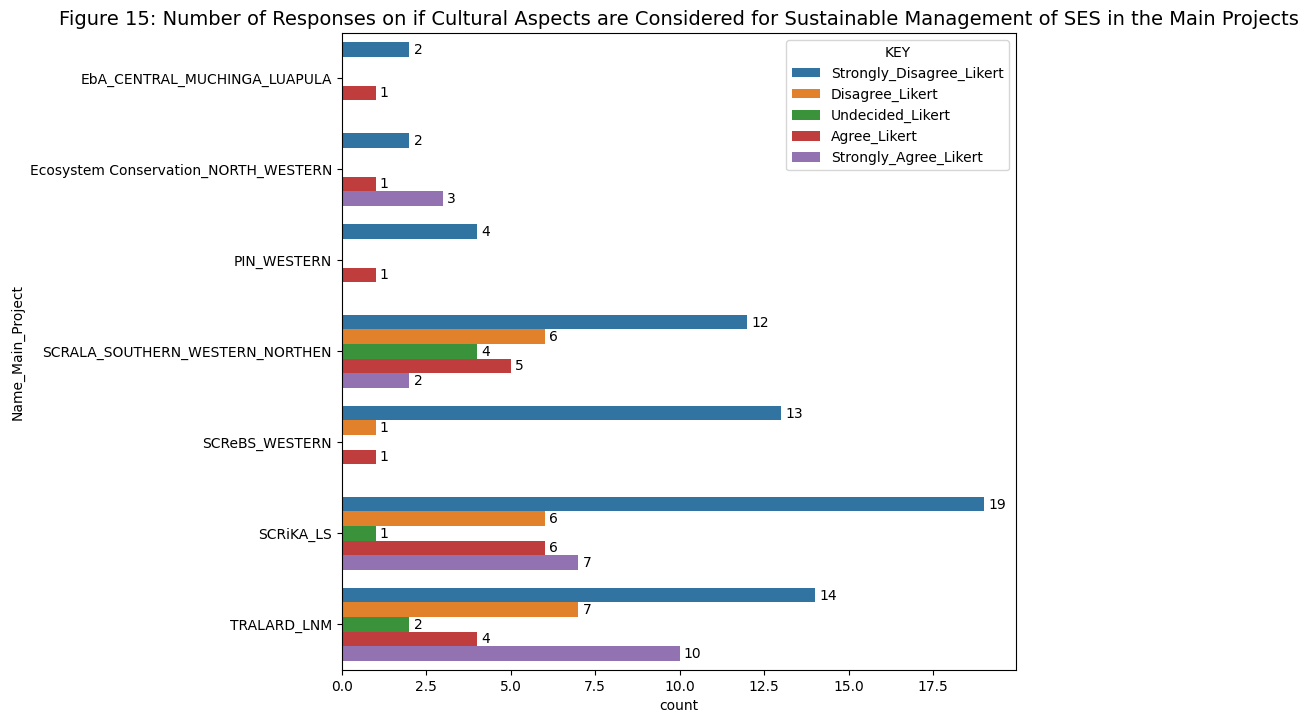

In [112]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CAC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Aspects_Considered", hue_order=hue_order, legend=True)
ax.set_title("Figure 15: Number of Responses on if Cultural Aspects are Considered for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [113]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CAC_R = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R1 = CAC_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R1grouped = CAC_R1.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R1

,Name_Main_Project,Cultural_Aspects_Considered,Cultural_Aspects_Considered_Reasons
1,TRALARD_LNM,Strongly_Agree_Likert,There is need to have power in what he formulating so that there is ownership
3,TRALARD_LNM,Strongly_Agree_Likert,At the time of getting the land for the project it commes with regulations
7,TRALARD_LNM,Strongly_Agree_Likert,There are rules that the river banks they do not need to cut down trees
11,TRALARD_LNM,Strongly_Agree_Likert,There are sometimes we have to give the Chiefs from the harvest that we collect or produce that has to be accounted for
17,TRALARD_LNM,Strongly_Agree_Likert,There is nothing because those things ended a long time ago and the Chiefs would talk to the spirits to protect the land
21,TRALARD_LNM,Strongly_Agree_Likert,They are not included
22,TRALARD_LNM,Strongly_Agree_Likert,If there are no customary practices the natural resources can get destroyed
23,EbA_CENTRAL_MUCHINGA_LUAPULA,Agree_Likert,No answer
24,TRALARD_LNM,Agree_Likert,No answer
25,TRALARD_LNM,Agree_Likert,If it is not done the product or project will not work well


In [114]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R1.iterrows():
    CAC_R1_filter_sentence = []
    CAC_R1_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R1_sentence):
       continue
    CAC_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R1_sentence)
    CAC_R1_words = nltk.word_tokenize(CAC_R1_sentence_cleaned)
    CAC_R1_words = [lemmatizer.lemmatize(w) for w in CAC_R1_words if w.lower() not in stop_words]
    CAC_R1_filter_sentence.extend(CAC_R1_words)
    print(CAC_R1_filter_sentence)

['need', 'power', 'formulating', 'ownership']
['time', 'getting', 'land', 'project', 'commes', 'regulation']
['rule', 'river', 'bank', 'need', 'cut', 'tree']
['sometimes', 'give', 'Chiefs', 'harvest', 'collect', 'produce', 'accounted']
['nothing', 'thing', 'ended', 'long', 'time', 'ago', 'Chiefs', 'would', 'talk', 'spirit', 'protect', 'land']
['included']
['customary', 'practice', 'natural', 'resource', 'get', 'destroyed']
['answer']
['answer']
['done', 'product', 'project', 'work', 'well']
['follow', 'customary', 'practice', 'people', 'burn', 'late', 'inorder']
['livelihood', 'improve']
['follow', 'historical', 'practice', 'forefather']
['cultural', 'practice', 'spririal', 'rite', 'done', 'traditional', 'authority']
['accessing', 'land', 'traditional', 'authority', 'also', 'give', 'instruction', 'put', 'livelihood', 'close', 'water', 'source', 'resource']
['project', 'operate', 'without', 'consulting', 'traditional', 'authority']
['answer']
['Sometimes', 'discus', 'locally', 'animal',

In [115]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CAC_R2 = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R3 = CAC_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R3grouped = CAC_R3.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R3

,Name_Main_Project,Cultural_Aspects_Considered,Cultural_Aspects_Considered_Reasons
0,TRALARD_LNM,Strongly_Disagree_Likert,There is no cultural history in the area
2,TRALARD_LNM,Strongly_Disagree_Likert,There are no cultural aspects
4,TRALARD_LNM,Strongly_Disagree_Likert,We only follow what the chiefs and the government say
5,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
6,TRALARD_LNM,Strongly_Disagree_Likert,There is nothing
...,...,...,...
143,SCReBS_WESTERN,Strongly_Disagree_Likert,They are not included
144,PIN_WESTERN,Strongly_Disagree_Likert,We do not include
147,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing
148,PIN_WESTERN,Strongly_Disagree_Likert,There is nothing


In [116]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R3.iterrows():
    CAC_R3_filter_sentence = []
    CAC_R3_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R3_sentence):
       continue
    CAC_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R3_sentence)
    CAC_R3_words = nltk.word_tokenize(CAC_R3_sentence_cleaned)
    CAC_R3_words = [lemmatizer.lemmatize(w) for w in CAC_R3_words if w.lower() not in stop_words]
    CAC_R3_filter_sentence.extend(CAC_R3_words)
    print(CAC_R3_filter_sentence)

['cultural', 'history', 'area']
['cultural', 'aspect']
['follow', 'chief', 'government', 'say']
['nothing']
['nothing']
['nothing']
['nothing']
['plan', 'given', 'u', 'TRALARD', 'consideration', 'cultural', 'history', 'formulating', 'project']
['nothing']
['moment', 'follow', 'law', 'government', 'cultural', 'norm']
['nothing']
['ask', 'headman', 'give', 'u', 'place', 'keep', 'goat', 'place', 'acceptable', 'traditional', 'law']
['mothing', 'momentvof', 'havong', 'traditional', 'leader', 'spritual', 'tje', 'project']
['include', 'cultural', 'practice']
['project', 'move', 'well', 'headman', 'project', 'otherwise', 'included', 'might', 'problem']
['available']
['consider']
['nothing']
['nothing']
[]
['nothing']
[]
['unneccesary']
['anything']
[]
['nothing']
['include']
[]
['nothing']
['include', 'aspect']
['nothing']
['nothing', 'included']
['Nothing', 'considered']
['nothing']
[]
['Nothing', 'considered']
['nothing']
['included']
['include']
['nothing', 'included']
['nothing']
['include

### 11.4 Main project and Measure of Indicators

In [117]:
MI_grouped = df2.groupby('Name_Main_Project')['Measure_Indicators'].value_counts(dropna=False)

In [118]:
MI_grouped1 = pd.DataFrame(MI_grouped)

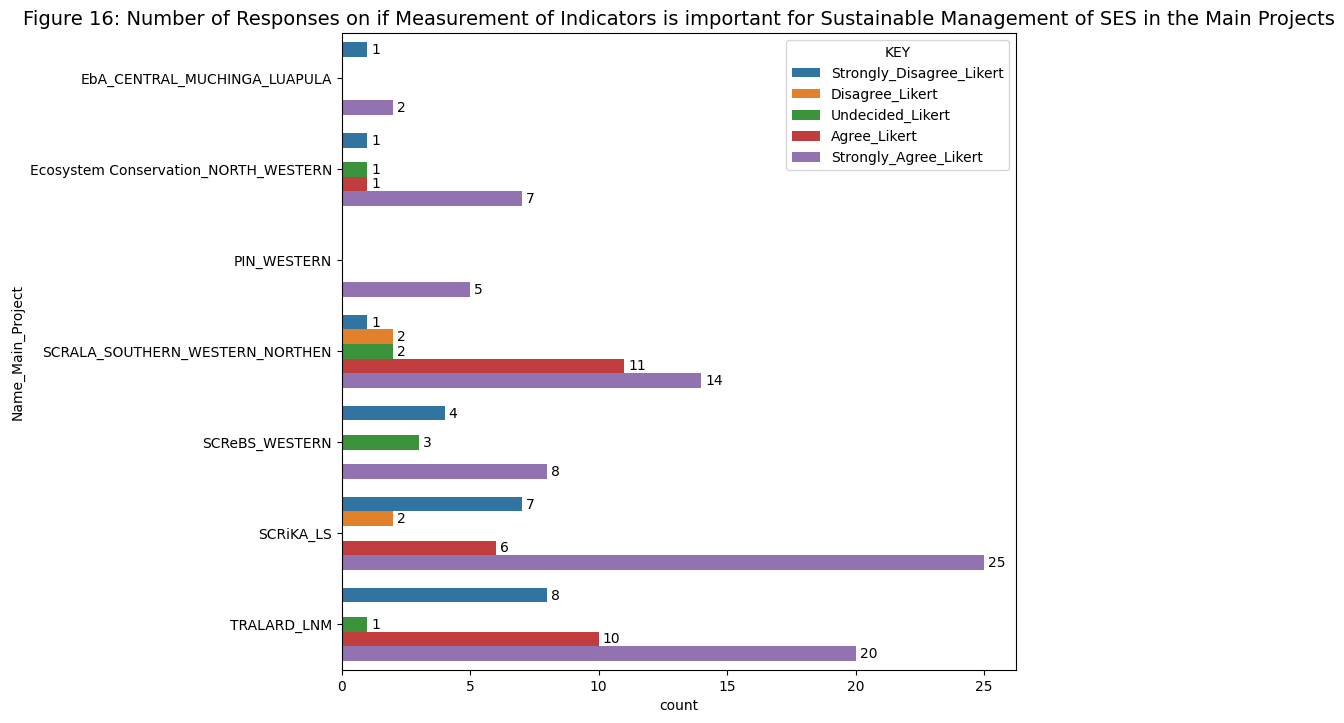

In [119]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = MI_grouped1, x="count", y="Name_Main_Project", hue="Measure_Indicators", hue_order=hue_order, legend=True)
ax.set_title("Figure 16: Number of Responses on if Measurement of Indicators is important for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.5 Main project and Livelihood Dependent

In [120]:
LD_grouped = df2.groupby('Name_Main_Project')['Livilihood_Depenedent'].value_counts(dropna=False)

In [121]:
LD_grouped1 = pd.DataFrame(LD_grouped)

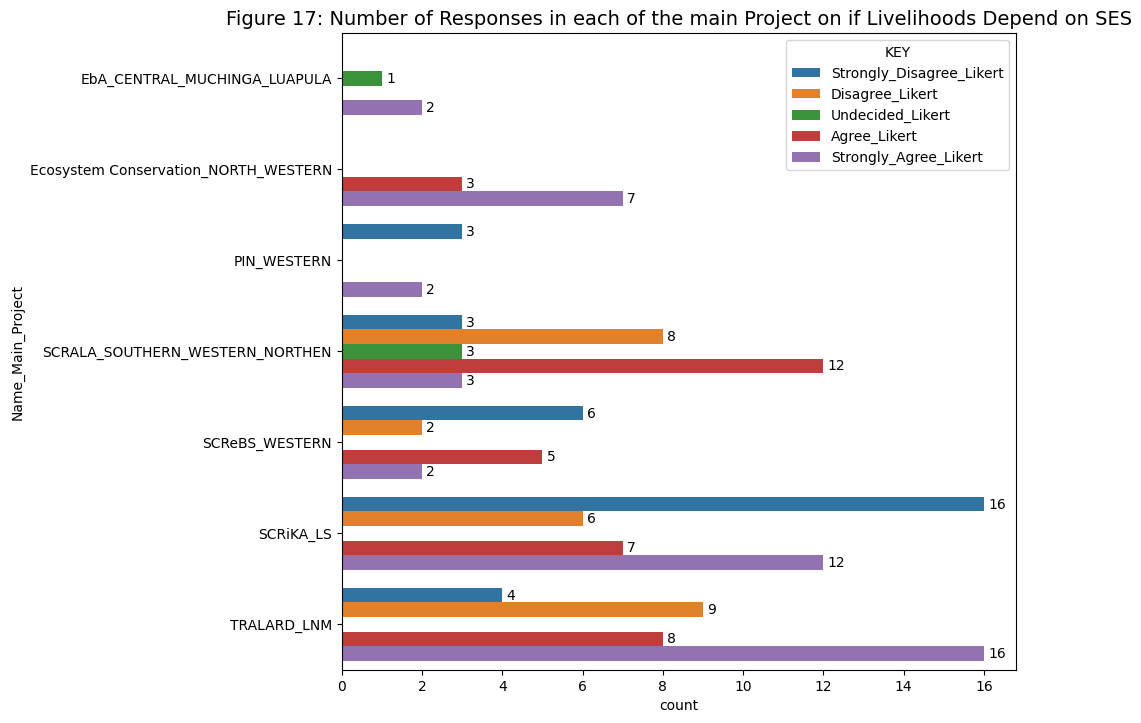

In [122]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = LD_grouped1, x="count", y="Name_Main_Project", hue="Livilihood_Depenedent", hue_order=hue_order, legend=True)
ax.set_title("Figure 17: Number of Responses in each of the main Project on if Livelihoods Depend on SES", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.6 Main project and Livelihood Changed

In [123]:
CL_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood'].value_counts(dropna=False)

In [124]:
CL_grouped1 = pd.DataFrame(CL_grouped)

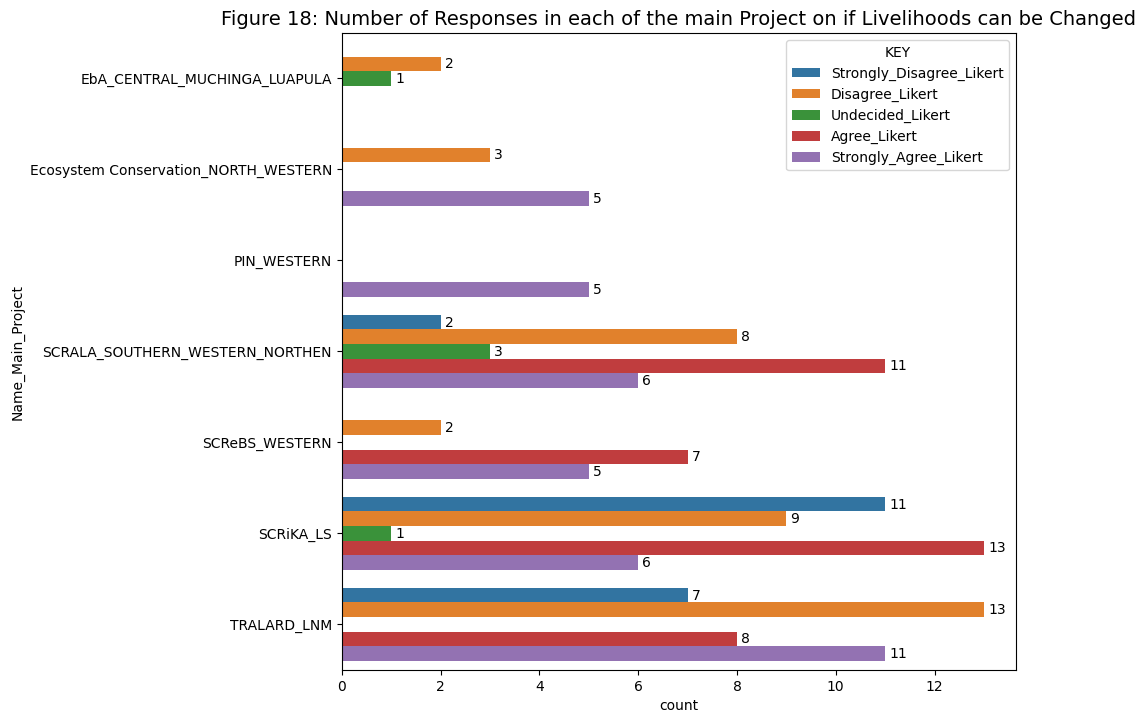

In [125]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CL_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 18: Number of Responses in each of the main Project on if Livelihoods can be Changed", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.7 Main project and Livelihood Changing Easy

In [126]:
CLE_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood_Easy'].value_counts(dropna=False)

In [127]:
CLE_grouped1 = pd.DataFrame(CLE_grouped)

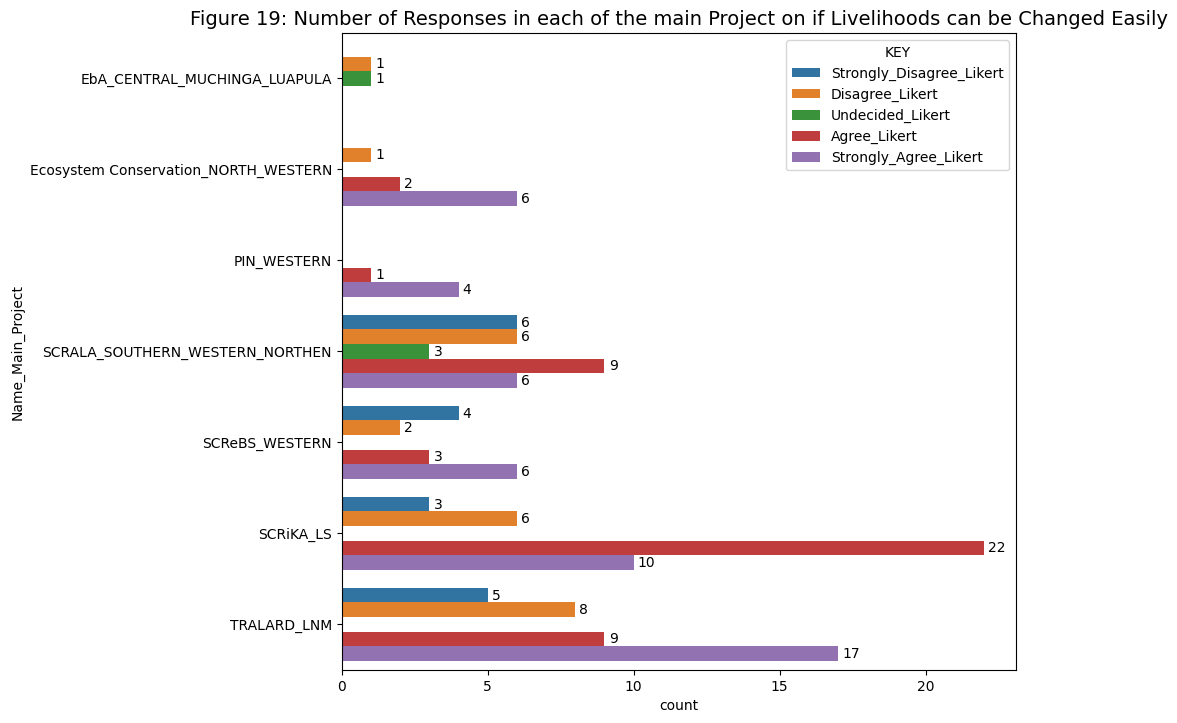

In [128]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CLE_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood_Easy", hue_order=hue_order, legend=True)
ax.set_title("Figure 19: Number of Responses in each of the main Project on if Livelihoods can be Changed Easily", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [129]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CLE_R = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R1 = CLE_R.drop(CLE_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R1grouped = CLE_R1.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R1

,Name_Main_Project,Change_Livelihood_Easy,Change_Livelihood_Easy_Reasons
0,TRALARD_LNM,Strongly_Agree_Likert,If the SES are taken care of they can increase in number and bring income to him
1,TRALARD_LNM,Strongly_Agree_Likert,The SeS can be depleted thus there need to change to agriculture like goat rearing
2,TRALARD_LNM,Agree_Likert,Change is easier because he is the one who has deciededs to change
4,TRALARD_LNM,Strongly_Agree_Likert,There has been things like climate change affecting us thus the thought to change
5,TRALARD_LNM,Strongly_Agree_Likert,If there is new improvement like cooking stove we can change the way of livelihood
...,...,...,...
144,PIN_WESTERN,Agree_Likert,It is easier as long as there is commitment
146,PIN_WESTERN,Strongly_Agree_Likert,The person can make a decision through looking back to what he or she done so as to make corrective measures
147,PIN_WESTERN,Strongly_Agree_Likert,As long as you are committed
148,PIN_WESTERN,Strongly_Agree_Likert,It is diffi jlt but as long as uou follow whag hou have been gaught uou can change


In [130]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R1.iterrows():
    CLE_R1_filter_sentence = []
    CLE_R1_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R1_sentence):
       continue
    CLE_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R1_sentence)
    CLE_R1_words = nltk.word_tokenize(CLE_R1_sentence_cleaned)
    CLE_R1_words = [lemmatizer.lemmatize(w) for w in CLE_R1_words if w.lower() not in stop_words]
    CLE_R1_filter_sentence.extend(CLE_R1_words)
    print(CLE_R1_filter_sentence)

['SES', 'taken', 'care', 'increase', 'number', 'bring', 'income']
['SeS', 'depleted', 'thus', 'need', 'change', 'agriculture', 'like', 'goat', 'rearing']
['Change', 'easier', 'one', 'deciededs', 'change']
['thing', 'like', 'climate', 'change', 'affecting', 'u', 'thus', 'thought', 'change']
['new', 'improvement', 'like', 'cooking', 'stove', 'change', 'way', 'livelihood']
['destruction', 'SES']
['need', 'change', 'cutting', 'activity']
['change', 'activity', 'destroy', 'environment']
['changed', 'learning']
['kept', 'well', 'project', 'like', 'chicken', 'goat', 'would', 'help', 'depend', 'natural', 'resource']
['fish', 'pond', 'project']
['also', 'improve', 'livelihood', 'future']
['long', 'money', 'livelihood']
['want', 'venture', 'farming', 'reason', 'shifted', 'place', 'located']
['sub', 'project', 'bee', 'keeping', 'disturbed', 'late', 'burning', 'early', 'burning', 'disturb', 'fire', 'much']
['need', 'change', 'instance', 'depend', 'water', 'Lulimala', 'river', 'dry', 'get', 'water'

In [131]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CLE_R2 = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R3 = CLE_R2.drop(CLE_R2.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R3grouped = CLE_R3.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R3

,Name_Main_Project,Change_Livelihood_Easy,Change_Livelihood_Easy_Reasons
3,TRALARD_LNM,Strongly_Disagree_Likert,Because my livelihood would improve
10,TRALARD_LNM,Strongly_Disagree_Likert,"Because everything we use comes from natural resources like tree for building, animals for proteins"
16,TRALARD_LNM,Strongly_Disagree_Likert,It is a source of income
18,TRALARD_LNM,Strongly_Disagree_Likert,They can assist in having adequate water if trees are not cut as well as future general to see the natural resources
19,TRALARD_LNM,Disagree_Likert,The world is becoming mordenised thus we need to adapt to the current status
20,TRALARD_LNM,Disagree_Likert,Thats where some of our income comes from
23,EbA_CENTRAL_MUCHINGA_LUAPULA,Disagree_Likert,It is because we depend on natural resources thus changing is not easy
24,TRALARD_LNM,Disagree_Likert,I do not use natural resources
28,TRALARD_LNM,Strongly_Disagree_Likert,We depend on agriculture and not the natural resource like forest
31,TRALARD_LNM,Disagree_Likert,We mostly use goats and pigs in our livelihoods


In [132]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R3.iterrows():
    CLE_R3_filter_sentence = []
    CLE_R3_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R3_sentence):
       continue
    CLE_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R3_sentence)
    CLE_R3_words = nltk.word_tokenize(CLE_R3_sentence_cleaned)
    CLE_R3_words = [lemmatizer.lemmatize(w) for w in CLE_R3_words if w.lower() not in stop_words]
    CLE_R3_filter_sentence.extend(CLE_R3_words)
    print(CLE_R3_filter_sentence)

['livelihood', 'would', 'improve']
['everything', 'use', 'come', 'natural', 'resource', 'like', 'tree', 'building', 'animal', 'protein']
['source', 'income']
['assist', 'adequate', 'water', 'tree', 'cut', 'well', 'future', 'general', 'see', 'natural', 'resource']
['world', 'becoming', 'mordenised', 'thus', 'need', 'adapt', 'current', 'status']
['Thats', 'income', 'come']
['depend', 'natural', 'resource', 'thus', 'changing', 'easy']
['use', 'natural', 'resource']
['depend', 'agriculture', 'natural', 'resource', 'like', 'forest']
['mostly', 'use', 'goat', 'pig', 'livelihood']
['livelihood', 'engage', 'keeping', 'goat', 'fish', 'farming']
['livelihood', 'like', 'keeping', 'goat', 'chicken', 'gardening', 'hiring', 'wedding', 'dress']
['use', 'domesticated', 'animal']
['use']
['thing', 'learning', 'already']
['money', 'protection', 'environment', 'yet', 'money', 'carbon', 'trade', 'waiting', 'long']
['used']
['changing', 'another', 'lifestyle', 'mean', 'starting', 'new', 'life']
['currently

### 11.8 Main project and Ecosystem Service Reduction

In [133]:
ESR_grouped = df2.groupby('Name_Main_Project')['Ecosystem_Services_Reduced'].value_counts(dropna=False)

In [134]:
ESR_grouped1 = pd.DataFrame(ESR_grouped)

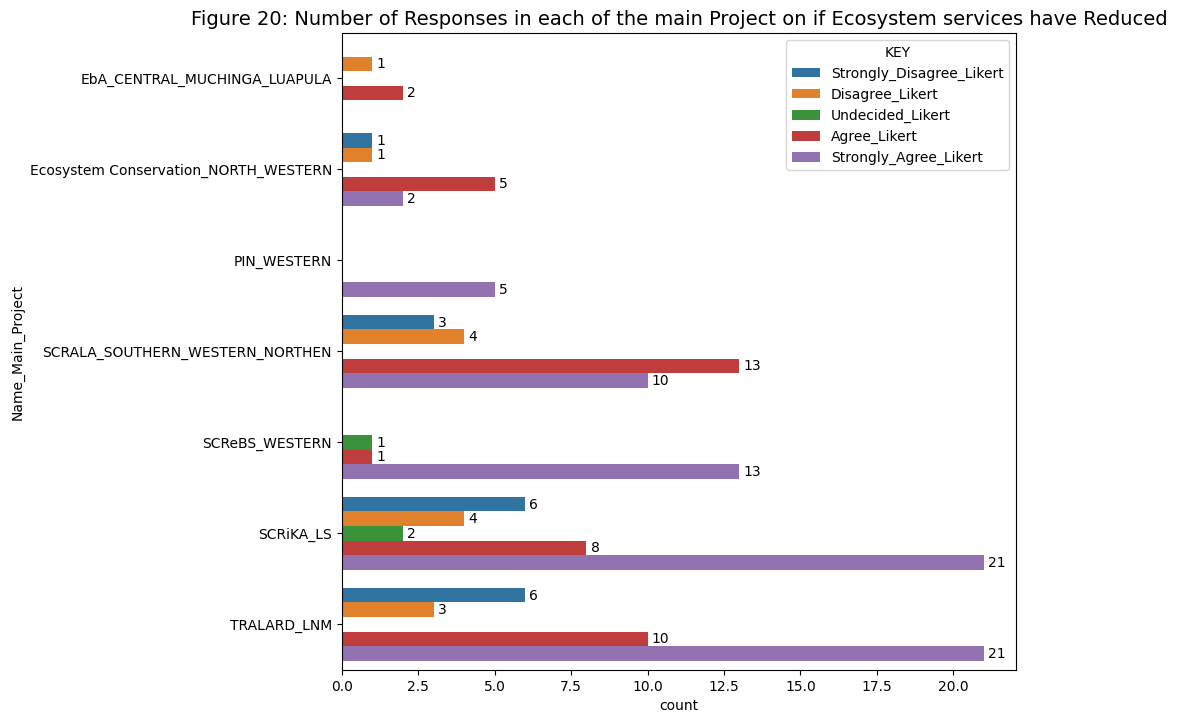

In [135]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = ESR_grouped1, x="count", y="Name_Main_Project", hue="Ecosystem_Services_Reduced", hue_order=hue_order, legend=True)
ax.set_title("Figure 20: Number of Responses in each of the main Project on if Ecosystem services have Reduced", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.9 Main project and Deforestation Increase

In [136]:
DI_grouped = df2.groupby('Name_Main_Project')['Deforestaion_Increased'].value_counts(dropna=False)

In [137]:
DI_grouped1 = pd.DataFrame(DI_grouped)

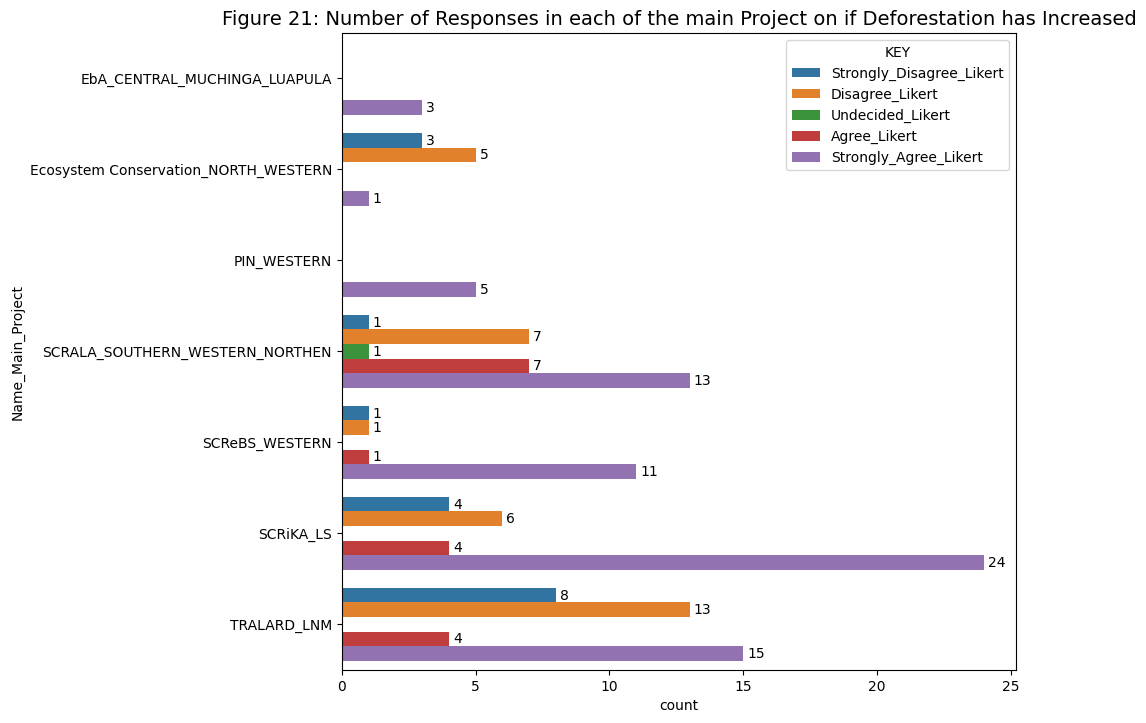

In [138]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = DI_grouped1, x="count", y="Name_Main_Project", hue="Deforestaion_Increased", hue_order=hue_order, legend=True)
ax.set_title("Figure 21: Number of Responses in each of the main Project on if Deforestation has Increased", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.10 Main project and Protected Areas as a Hinderance

In [139]:
PAHL_grouped = df2.groupby('Name_Main_Project')['Protected_Areas_Hinderarnce_Livelihood'].value_counts(dropna=False)

In [140]:
PAHL_grouped1 = pd.DataFrame(PAHL_grouped)

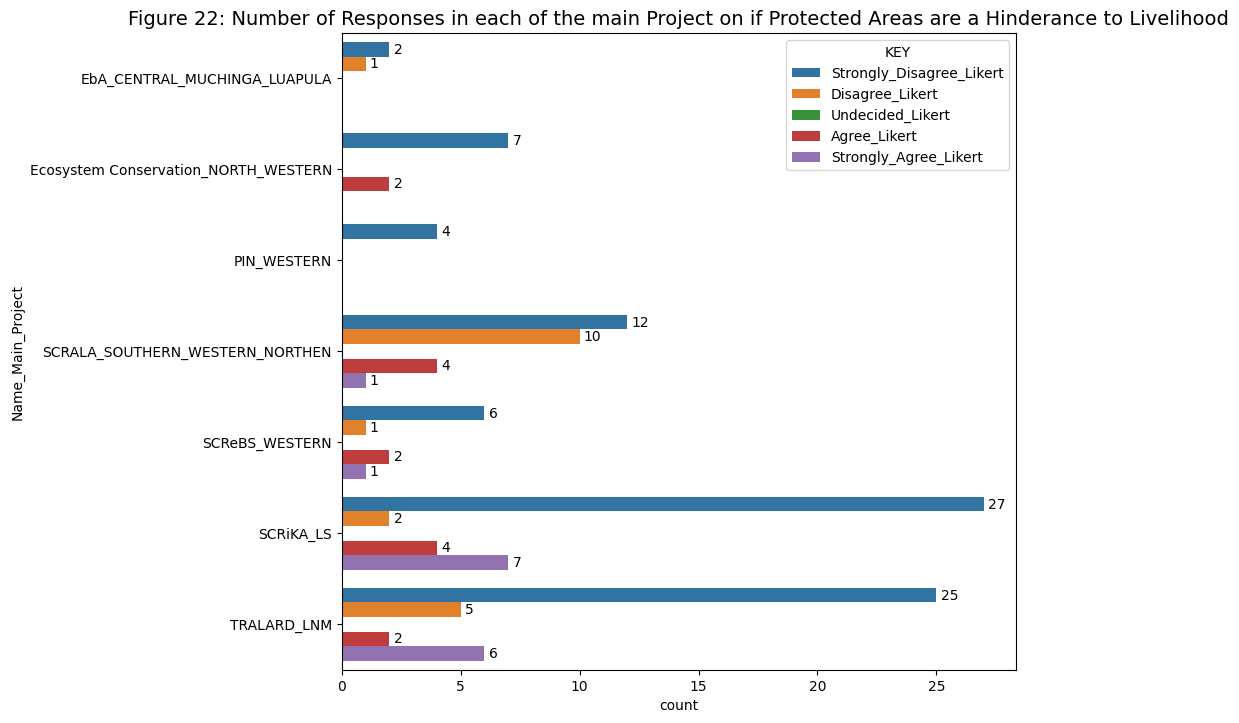

In [141]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = PAHL_grouped1, x="count", y="Name_Main_Project", hue="Protected_Areas_Hinderarnce_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 22: Number of Responses in each of the main Project on if Protected Areas are a Hinderance to Livelihood", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.11 Main project and New Livelihood Projects

In [142]:
NLP_grouped = df2.groupby('Name_Main_Project')['New_Livelihood_Projects'].value_counts(dropna=False)

In [143]:
NLP_grouped1 = pd.DataFrame(NLP_grouped)

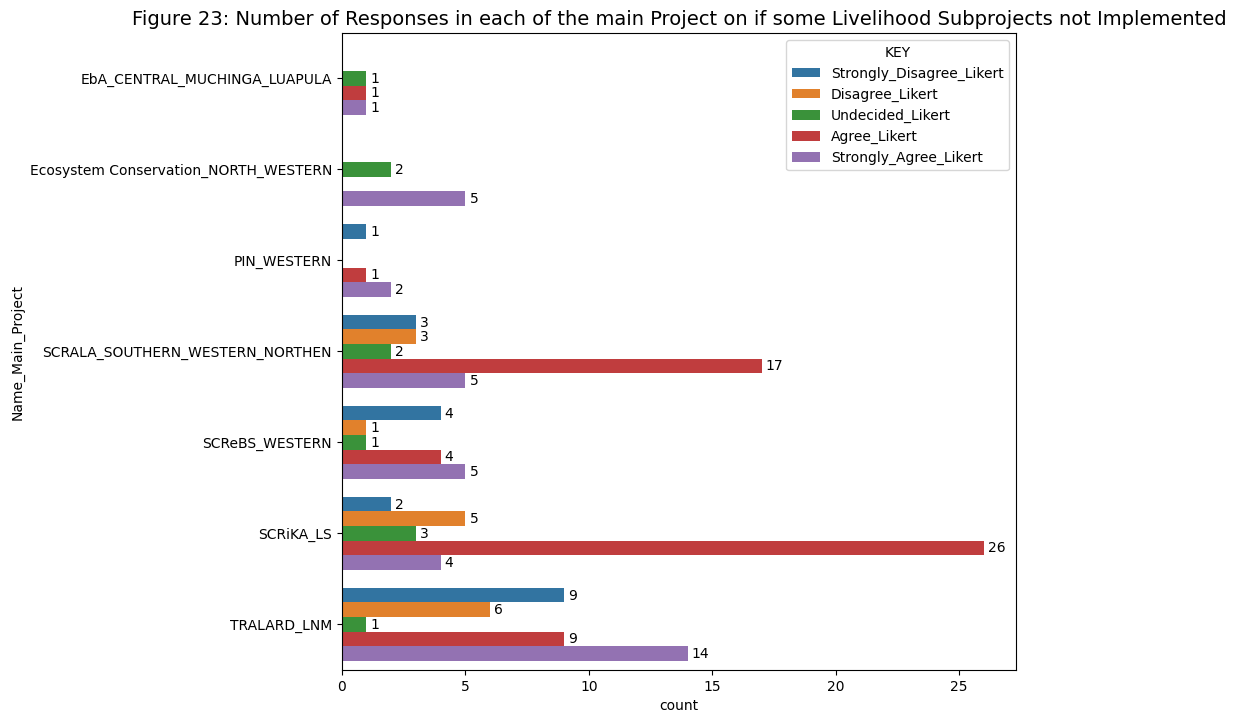

In [144]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = NLP_grouped1, x="count", y="Name_Main_Project", hue="New_Livelihood_Projects", hue_order=hue_order, legend=True)
ax.set_title("Figure 23: Number of Responses in each of the main Project on if some Livelihood Subprojects not Implemented", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.12 Main project and Sustainability of Subprojects

In [145]:
SSC_grouped = df2.groupby('Name_Main_Project')['Subprojects_Sustainability_Contribution'].value_counts(dropna=False)

In [146]:
SSC_grouped1 = pd.DataFrame(SSC_grouped)

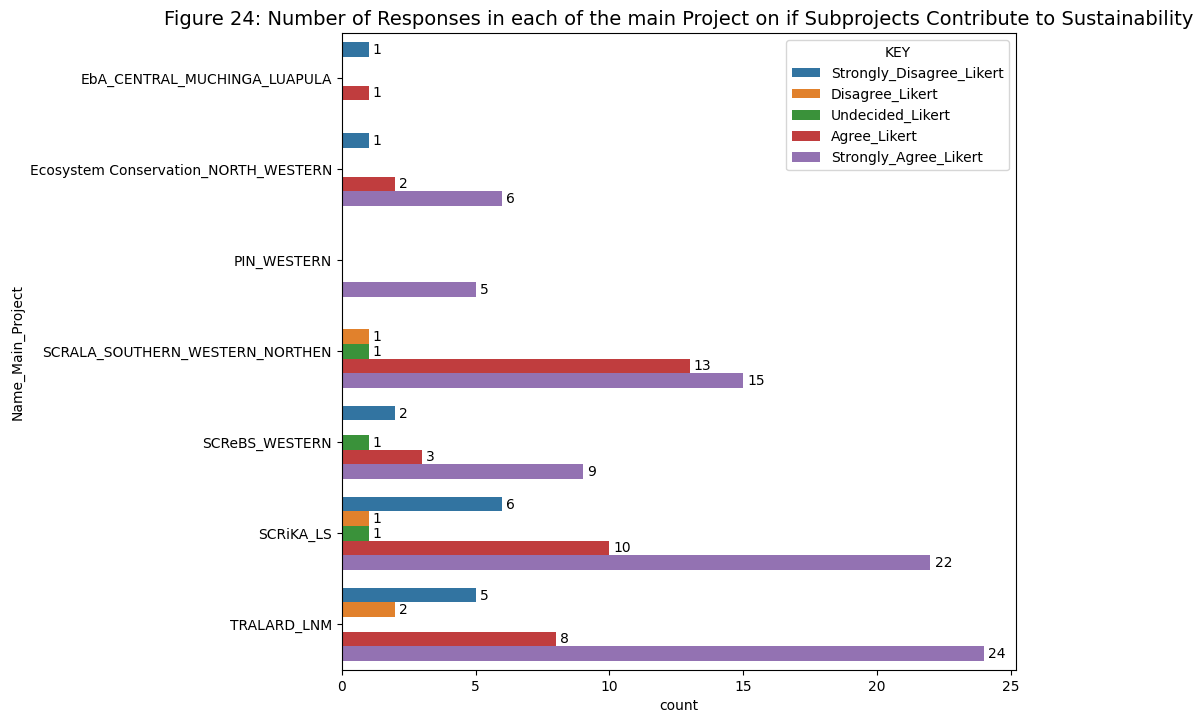

In [147]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = SSC_grouped1, x="count", y="Name_Main_Project", hue="Subprojects_Sustainability_Contribution", hue_order=hue_order, legend=True)
ax.set_title("Figure 24: Number of Responses in each of the main Project on if Subprojects Contribute to Sustainability", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 12. Converting the Notebook

In [148]:
with open('Data_Analysis.ipynb', 'r') as f:
    notebook = nbformat.read(f, as_version=4)

# Initialize the HTML Exporter
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the HTML output
with open('Data_Analysis.html', 'w') as f:
    f.write(body)

print("Conversion to HTML completed!")

Conversion to HTML completed!


[<a href="#Purpose-of-the-Analysis">Back to top</a>]